In [1]:
# Capstone 3 SaaS Sales Analysis - Enhancing SaaS Revenue through Data-Driven Sales and Customer Analytics

# Tujuan Utama
# Mengidentifikasi dan mengoptimalkan faktor-faktor yang memengaruhi pendapatan pada perusahaan SaaS melalui analisis data penjualan dan perilaku pelanggan.

In [2]:
# Penjabaran Tujuan Secara Spesifik

# 1. Menganalisis pola pembelian pelanggan
# Untuk memahami produk atau layanan mana yang paling diminati, frekuensi pembelian, dan perilaku pelanggan dari waktu ke waktu.
 
# 2. Mengelompokkan pelanggan berdasarkan karakteristik dan nilai

# 3. Mengevaluasi performa penjualan berdasarkan kategori untuk mengetahui kontribusi masing-masing segmen terhadap revenue.

# 4. Mengidentifikasi peluang peningkatan revenue melalui upsell/cross selling, targeting segmen potensial, dan mengurangi churn rate pelanggan bernilai tinggi.

# 5. Menyediakan rekomendasi bisnis berbasis insight data yang actionable untuk tim sales, marketing, finance, product team dan manajemen.

In [3]:
# Library and Setup

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Statistik dan analisis
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Pengaturan tampilan
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')

In [4]:
# Load data
df = pd.read_csv('SaaS-Sales.csv')
df.head(10)

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164
5,6,AMER-2020-115812,6/9/2020,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,SaaS Connector Pack,8RM88WFOAE,48.8600,7,0.00,14.1694
6,7,AMER-2020-115812,6/9/2020,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,ChatBot Plugin,4SYTVM0746,7.2800,4,0.00,1.9656
7,8,AMER-2020-115812,6/9/2020,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,Site Analytics,07842ES7DY,907.1520,6,0.20,90.7152
8,9,AMER-2020-115812,6/9/2020,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,ContactMatcher,XPBOBXWXA3,18.5040,3,0.20,5.7825
9,10,AMER-2020-115812,6/9/2020,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,OneView,71J8P9Z1P0,114.9000,5,0.00,34.4700


In [5]:
# Informasi umum dataset
df.info()

# Statistik deskriptif awal
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9.994000e+03,9994,9994,9994,9994,9994,9994,9994.000000,9994,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,NaN,5009,1237,NaN,793,48,262,3,12,99,NaN,10,3,14,9994,NaN,NaN,NaN,NaN
top,NaN,EMEA-2023-100111,9/6/2022,NaN,Leonard Kelly,United States,London,EMEA,NAMER,Allianz,NaN,Finance,SMB,ContactMatcher,16GRM07R1K,NaN,NaN,NaN,NaN
freq,NaN,14,38,NaN,37,2001,922,4219,2507,192,NaN,2127,5191,1842,1,NaN,NaN,NaN,NaN
mean,4997.500000,NaN,NaN,2.021803e+07,NaN,NaN,NaN,NaN,NaN,NaN,1049.771963,NaN,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
std,2885.163629,NaN,NaN,1.123898e+04,NaN,NaN,NaN,NaN,NaN,NaN,29.719388,NaN,NaN,NaN,NaN,623.245101,2.225110,0.206452,234.260108
min,1.000000,NaN,NaN,2.020010e+07,NaN,NaN,NaN,NaN,NaN,NaN,1001.000000,NaN,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,NaN,NaN,2.021052e+07,NaN,NaN,NaN,NaN,NaN,NaN,1024.000000,NaN,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,NaN,NaN,2.022063e+07,NaN,NaN,NaN,NaN,NaN,NaN,1049.000000,NaN,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,NaN,NaN,2.023052e+07,NaN,NaN,NaN,NaN,NaN,NaN,1076.000000,NaN,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000


In [6]:
# A. Data Cleansing

# 1. Check missing values
missing_values = df.isnull().sum()

# Cek string kosong ''
empty_strings = (df == '').sum()

# Cek tanda strip '-'
dash_values = (df == '-').sum()

# Gabungkan hasilnya
missing_check = pd.DataFrame({
    'Missing (NaN)': missing_values,
    'Empty Strings': empty_strings,
    'Dash Values': dash_values
})

# Tampilkan hanya kolom yang ada nilainya
missing_check = missing_check[(missing_check != 0).any(axis=1)]

print("Pengecekan Missing Value, Empty String, dan Tanda Strip:")
print(missing_check)

Pengecekan Missing Value, Empty String, dan Tanda Strip:
Empty DataFrame
Columns: [Missing (NaN), Empty Strings, Dash Values]
Index: []


In [7]:
# Penanganan missing value 
df = df.dropna() 

# 2. Cek duplikat
print(f"Jumlah data duplikat: {df.duplicated().sum()}")

# Hapus duplikat
df = df.drop_duplicates()

Jumlah data duplikat: 0


In [8]:
# 3. Metode IQR untuk mendeteksi outlier
# a. Cek semua kolom numerik
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# b. Inisialisasi dictionary untuk menyimpan hasil outlier
outlier_summary = {}

# c. Looping setiap kolom numerik dan hitung outlier dengan IQR
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_count = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
    
    outlier_summary[col] = outlier_count
    
# Metode IQR (Interquartile Range) adalah salah satu teknik statistik yang umum digunakan untuk mendeteksi outlier (nilai pencilan) dalam sebuah dataset. 
# IQR mengukur sebaran nilai tengah dari data, dan outlier didefinisikan sebagai nilai yang terlalu jauh di bawah atau di atas rentang tengah tersebut.

# d. Tampilkan hasil
for col, count in outlier_summary.items():
    print(f"{col}: {count} outlier(s)")

Row ID: 0 outlier(s)
Date Key: 0 outlier(s)
Customer ID: 0 outlier(s)
Sales: 1167 outlier(s)
Quantity: 170 outlier(s)
Discount: 856 outlier(s)
Profit: 1881 outlier(s)


In [9]:
# B. Feature Engineering

# Proses feature engineering dilakukan untuk mengekstrak dan membentuk fitur-fitur baru dari data mentah sehingga dapat meningkatkan kualitas analisis dan memperkuat insight bisnis.

In [10]:
# Pastikan kolom tanggal dalam format datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# 1. Invoice_Month & Invoice_Year
df['Invoice_Month'] = df['Order Date'].dt.month
df['Invoice_Year'] = df['Order Date'].dt.year

# 2. Invoice_Weekday
df['Invoice_Weekday'] = df['Order Date'].dt.day_name()

# 3. Discount_Applied
df['Discount_Applied'] = df['Discount'].apply(lambda x: 1 if x > 0 else 0)

# 4. Profit_Margin
df['Profit_Margin'] = df['Profit'] / df['Sales']
df['Profit_Margin'] = df['Profit_Margin'].replace([float('inf'), -float('inf')], pd.NA)

# 5. High_Profit_Margin_Flag
mean_margin = df['Profit_Margin'].mean(skipna=True)
df['High_Profit_Margin_Flag'] = df['Profit_Margin'].apply(lambda x: 1 if pd.notna(x) and x > mean_margin else 0)

# 6. Sales_per_Unit
df['Sales_per_Unit'] = df['Sales'] / df['Quantity']
df['Sales_per_Unit'] = df['Sales_per_Unit'].replace([float('inf'), -float('inf')], pd.NA)

# 7. Revenue_Category
df['Revenue_Category'] = pd.qcut(df['Sales'], q=3, labels=['Low', 'Mid', 'High'])

# 8. Customer_Total_Orders
df['Customer_Total_Orders'] = df.groupby('Customer ID')['Order ID'].transform('count')

# 9. Customer_Total_Sales
df['Customer_Total_Sales'] = df.groupby('Customer ID')['Sales'].transform('sum')

# 10. Replace infinite again
df.replace([float('inf'), -float('inf')], pd.NA, inplace=True)

# 11. Invoice_YearMonth
df['Invoice_YearMonth'] = df['Order Date'].dt.to_period('M').astype(str)

# 12. Country_Total_Sales
df['Country_Total_Sales'] = df.groupby('Country')['Sales'].transform('sum')

# 13. Country_Profit
df['Country_Profit'] = df.groupby('Country')['Profit'].transform('sum')

# Cek hasil
print(df.head())

   Row ID          Order ID Order Date  Date Key    Contact Name  \
0       1  EMEA-2022-152156 2022-11-09  20221109     Nathan Bell   
1       2  EMEA-2022-152156 2022-11-09  20221109     Nathan Bell   
2       3  AMER-2022-138688 2022-06-13  20220613  Deirdre Bailey   
3       4  EMEA-2021-108966 2021-10-11  20211011      Zoe Hodges   
4       5  EMEA-2021-108966 2021-10-11  20211011      Zoe Hodges   

         Country           City Region Subregion           Customer  \
0        Ireland         Dublin   EMEA      UKIR            Chevron   
1        Ireland         Dublin   EMEA      UKIR            Chevron   
2  United States  New York City   AMER     NAMER        Phillips 66   
3        Germany      Stuttgart   EMEA   EU-WEST  Royal Dutch Shell   
4        Germany      Stuttgart   EMEA   EU-WEST  Royal Dutch Shell   

   Customer ID Industry    Segment                 Product     License  \
0         1017   Energy        SMB         Marketing Suite  16GRM07R1K   
1         1017  

In [11]:
# C. Exploratory Data Analysis (EDA)

# Tujuan utama EDA di sini adalah:
# 1. Memahami perilaku pelanggan (siapa yang paling berkontribusi pada revenue)
# 2. Mengidentifikasi tren penjualan
# 3. Menilai efektivitas diskon
# 4. Segmentasi Profit Margin
# 5. Analisis Pelanggan (Customer Analytics)
# 6. Revenue Category
# 7. Sales per Unit dan Efisiensi
# 8. Outlier dalam Penjualan: Red Flag atau Golden Opportunity?
# 9. Analisis RFM (Recency, Frequency, Monetary)
# 10. Perhitungan Customer Lifetime Value (CLV)
# 11. Menghitung Churn Rate 

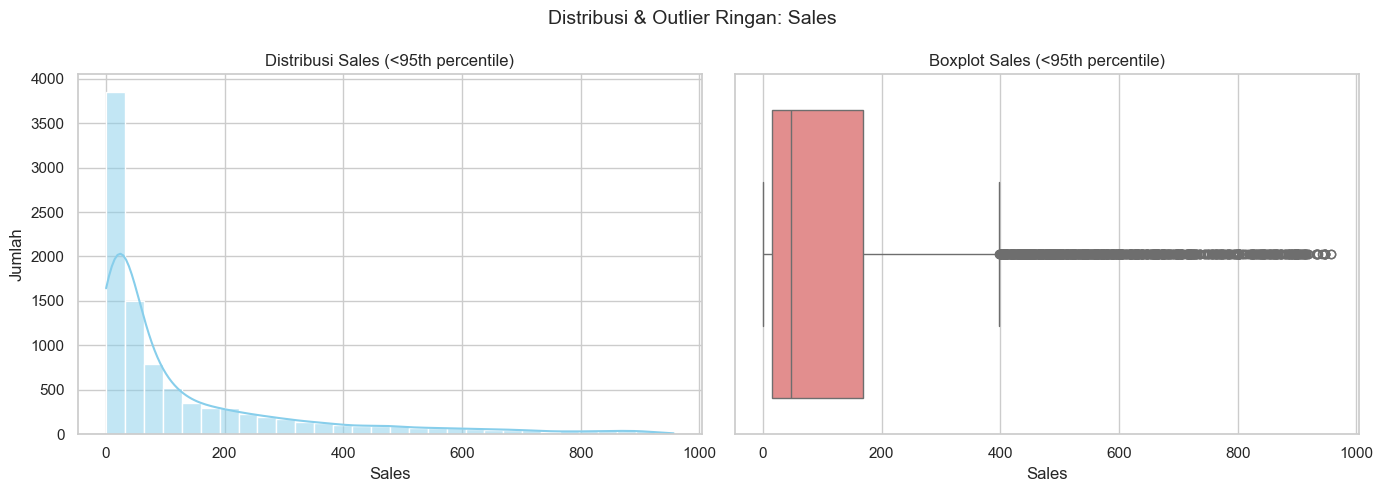

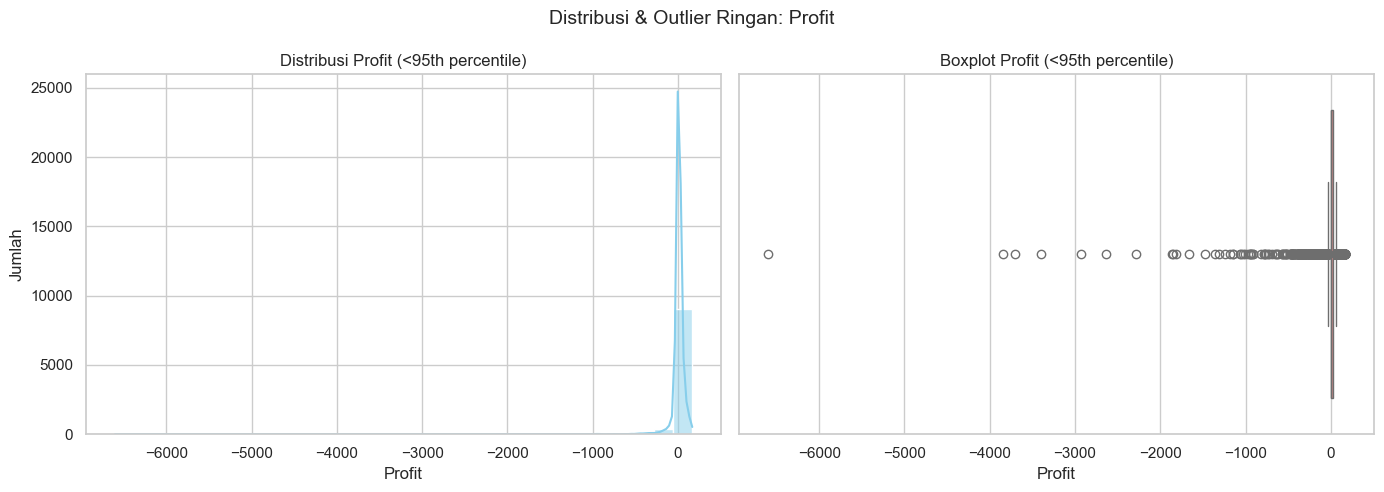

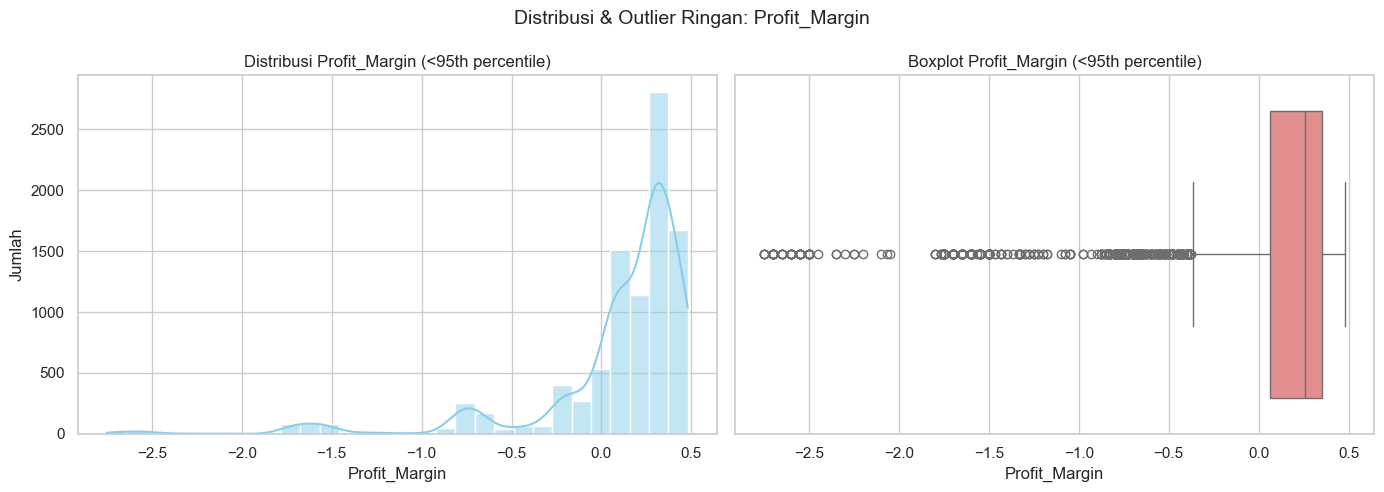

In [12]:
# 1. Distribusi Penjualan dan Profit
# Tujuan: Mengetahui bagaimana distribusi penjualan dan margin secara keseluruhan

import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Fitur yang ingin divisualisasikan
features = ['Sales', 'Profit', 'Profit_Margin']

# Loop setiap fitur
for feature in features:
    # Filter data < 95th percentile
    upper_limit = df[feature].quantile(0.95)
    filtered = df[df[feature] < upper_limit]

    # Visualisasi
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Histogram
    sns.histplot(data=filtered, x=feature, bins=30, kde=True, ax=axes[0], color='skyblue')
    axes[0].set_title(f'Distribusi {feature} (<95th percentile)')
    axes[0].set_xlabel(feature)
    axes[0].set_ylabel('Jumlah')

    # Boxplot
    sns.boxplot(data=filtered, x=feature, ax=axes[1], color='lightcoral')
    axes[1].set_title(f'Boxplot {feature} (<95th percentile)')
    axes[1].set_xlabel(feature)
    plt.suptitle(f'Distribusi & Outlier Ringan: {feature}', fontsize=14)
    plt.tight_layout()
    plt.show()
    
# Tujuan Filter 95th Percentile:
# Membantu: Menangkap distribusi mayoritas transaksi tanpa outlier ekstrem.

# Hasil Analisa:
    
# - Distribusi penjualan sangat right skewed (miring ke kanan).
# Sebagian besar nilai sales berada di bawah 200.
# Boxplot:
# Ada cukup banyak outlier ringan, walaupun sudah dibatasi hingga persentil ke-95.
# Persebaran nilai cukup luas, tapi mayoritas penjualan tetap rendah.
# Kesimpulan:
# Sebagian besar transaksi memiliki nilai penjualan yang kecil, tetapi ada beberapa transaksi bernilai 
# sangat tinggi (outlier).

# - Profit juga sangat right skewed, namun masih ada banyak nilai negatif.
# Sebagian besar nilai profit mendekati nol, tapi ada juga kerugian besar.
# Boxplot:
# Banyak outlier negatif, yang menunjukkan beberapa transaksi menghasilkan kerugian signifikan.
# Kesimpulan:
# Banyak transaksi memberikan keuntungan kecil, tetapi ada juga cukup banyak kerugian besar. 
# Profitabilitas sangat bervariasi.


# Distribusi Profit_Margin lebih seimbang, tetapi tetap ada puncak di sekitar 0.2–0.4.
# Masih terlihat ada nilai negatif signifikan.
# Boxplot:
# Terdapat banyak outlier negatif dalam margin keuntungan.
# Sebagian besar margin keuntungan positif namun tidak terlalu tinggi.
# Kesimpulan:
# Meskipun sebagian besar transaksi memiliki margin keuntungan positif, banyak transaksi justru 
# mengalami margin negatif yang ekstrem (kerugian proporsional besar).

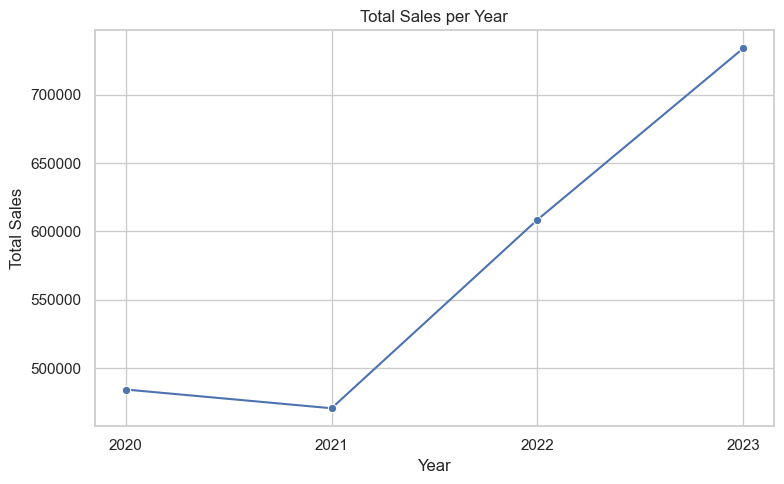

In [13]:
# 2. Tren Penjualan dari Waktu ke Waktu
# Tujuan: Menganalisis performa penjualan berdasarkan dimensi waktu

# a. Line Plot: Invoice_Year vs Total Sales
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator

# Total Sales per Year
yearly_sales = df.groupby('Invoice_Year')['Sales'].sum().reset_index()

# Plot
plt.figure(figsize=(8, 5))
sns.lineplot(data=yearly_sales, x='Invoice_Year', y='Sales', marker='o')
plt.title('Total Sales per Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid(True)

# Atur agar sumbu X (tahun) hanya menampilkan bilangan bulat
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

plt.tight_layout()
plt.show()

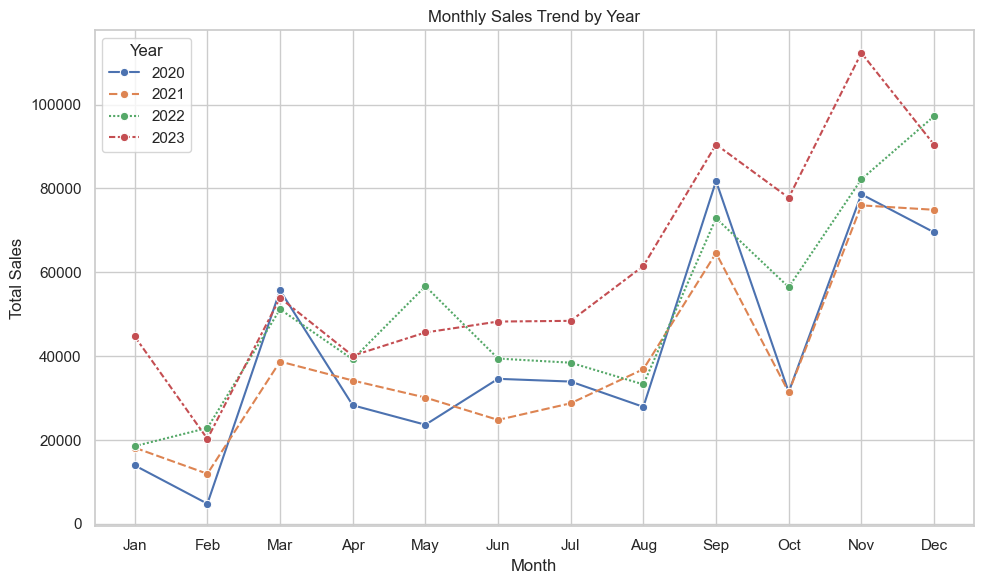

In [14]:
# b. Line Plot: Invoice_Month per Tahun

# Total Sales per Month-Year
monthly_sales = df.groupby(['Invoice_Year', 'Invoice_Month'])['Sales'].sum().reset_index()

# Membuat kolom 'Month_Label' untuk label bulan
import calendar
monthly_sales['Month_Label'] = monthly_sales['Invoice_Month'].apply(lambda x: calendar.month_abbr[x])

# Pivot untuk plot per tahun
pivot_table = monthly_sales.pivot(index='Invoice_Month', columns='Invoice_Year', values='Sales')

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=pivot_table, marker='o')
plt.title('Monthly Sales Trend by Year')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(ticks=range(1, 13), labels=calendar.month_abbr[1:])
plt.grid(True)
plt.legend(title='Year')
plt.tight_layout()
plt.show()

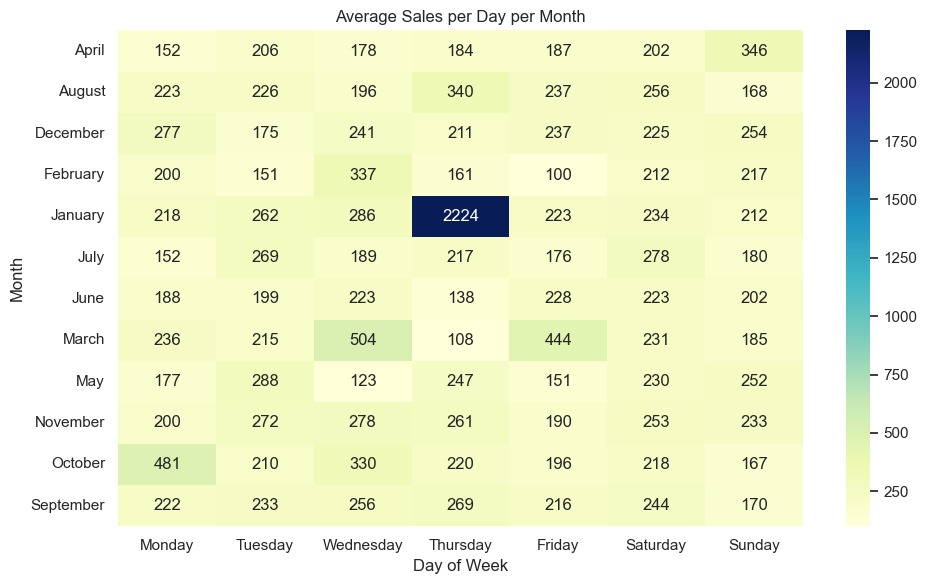

In [15]:
# c. Heatmap: Penjualan per Hari dalam Minggu

# Tambahkan kolom hari dan bulan (jika belum)
df['Day_of_Week'] = df['Order Date'].dt.day_name()
df['Month'] = df['Order Date'].dt.month_name()

# Total rata-rata sales berdasarkan hari & bulan
heatmap_data = df.groupby(['Month', 'Day_of_Week'])['Sales'].mean().unstack()

# Optional: urutkan hari agar sesuai kalender
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data[day_order]

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title('Average Sales per Day per Month')
plt.xlabel('Day of Week')
plt.ylabel('Month')
plt.tight_layout()
plt.show()

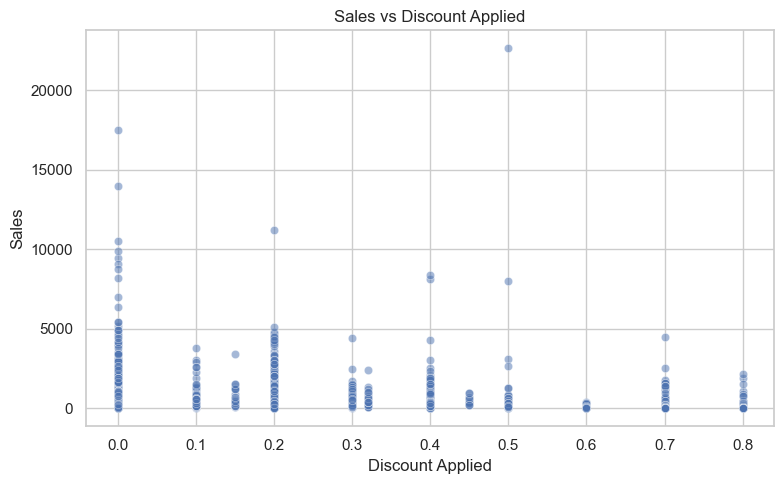

In [16]:
# 3. Efektivitas Diskon
# Tujuan: Menilai apakah pemberian diskon meningkatkan pendapatan

# a. Scatter Plot: Discount vs Sales
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Discount', y='Sales', alpha=0.5)
plt.title('Sales vs Discount Applied')
plt.xlabel('Discount Applied')
plt.ylabel('Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

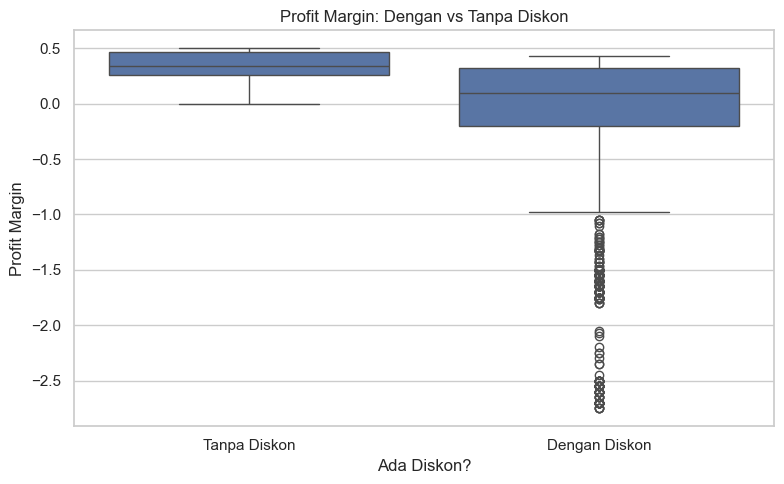

In [17]:
# b. Boxplot: Profit Margin dengan vs tanpa Diskon

# Buat flag untuk menunjukkan apakah ada diskon atau tidak
df['Has_Discount'] = df['Discount_Applied'] > 0

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Has_Discount', y='Profit_Margin')
plt.title('Profit Margin: Dengan vs Tanpa Diskon')
plt.xlabel('Ada Diskon?')
plt.ylabel('Profit Margin')
plt.xticks([0, 1], ['Tanpa Diskon', 'Dengan Diskon'])
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


/var/folders/9_/06hc1w9969g8zktjcjcs_f6w0000gn/T/ipykernel_44268/1929609049.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=avg_sales_by_discount, x='Discount_Bin', y='Sales', palette='Blues_d')


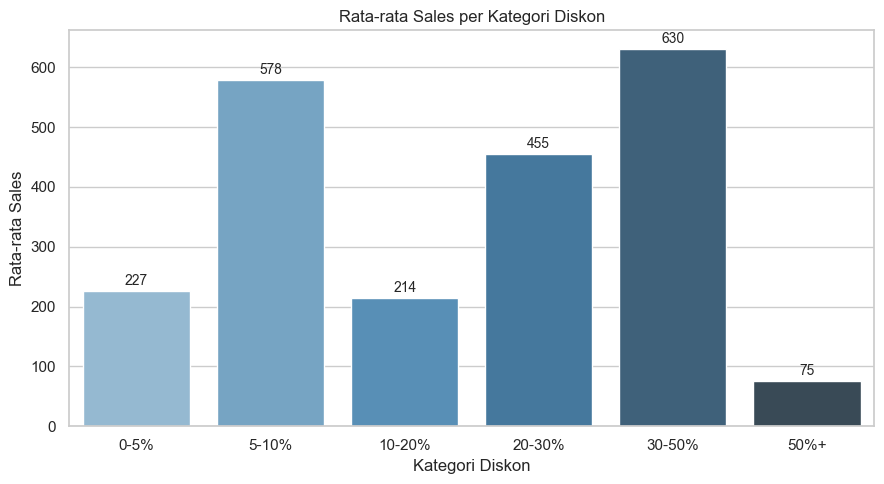

In [18]:
# c. Bar Chart: Rata-rata Sales per Kategori Diskon (binning)

# Buat kategori diskon (binning)
df['Discount_Bin'] = pd.cut(
    df['Discount'],
    bins=[-0.01, 0.05, 0.10, 0.20, 0.30, 0.50, 1.0],
    labels=['0-5%', '5-10%', '10-20%', '20-30%', '30-50%', '50%+']
)

# Hitung rata-rata penjualan per bin diskon
avg_sales_by_discount = df.groupby('Discount_Bin', observed=True)['Sales'].mean().reset_index()

# Plot
plt.figure(figsize=(9, 5))
ax = sns.barplot(data=avg_sales_by_discount, x='Discount_Bin', y='Sales', palette='Blues_d')

# Tambahkan label pada setiap batang
for i, row in avg_sales_by_discount.iterrows():
    ax.text(i, row['Sales'] + 5, f"{row['Sales']:.0f}", ha='center', va='bottom', fontsize=10)

plt.title('Rata-rata Sales per Kategori Diskon')
plt.xlabel('Kategori Diskon')
plt.ylabel('Rata-rata Sales')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

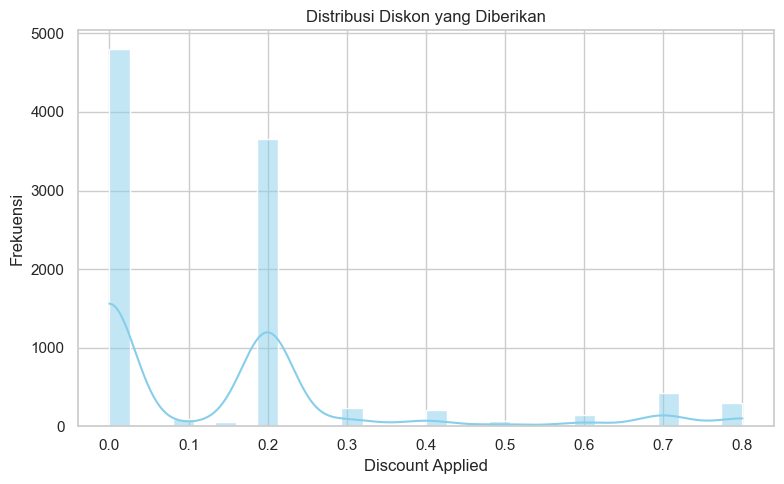

In [19]:
# d. Visualisasi Distribusi Diskon Applied
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Discount', bins=30, kde=True, color='skyblue')
plt.title('Distribusi Diskon yang Diberikan')
plt.xlabel('Discount Applied')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.tight_layout()
plt.show()

In [20]:
# e. Statistik Ringkasan Diskon
df['Discount'].describe()

# Statistik	Nilai	Interpretasi
# count: Ada 9.994 transaksi dengan nilai diskon tercatat
# mean: Rata-rata diskon yang diberikan adalah sekitar 15.6%
# std: Terdapat variasi yang cukup tinggi dalam pemberian diskon
# min: Ada transaksi yang tidak mendapat diskon sama sekali
# 25%: 25% transaksi tidak mendapatkan diskon
# 50%: Median = 20%, artinya setengah transaksi mendapatkan diskon ≤ 20%
# 75%: 75% transaksi mendapatkan diskon ≤ 20%
# max: Diskon maksimum yang diberikan adalah 80%


count    9994.000000
mean        0.156203
std         0.206452
min         0.000000
25%         0.000000
50%         0.200000
75%         0.200000
max         0.800000
Name: Discount, dtype: float64

/var/folders/9_/06hc1w9969g8zktjcjcs_f6w0000gn/T/ipykernel_44268/2186669546.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='High_Profit_Margin_Flag', palette='Set2')


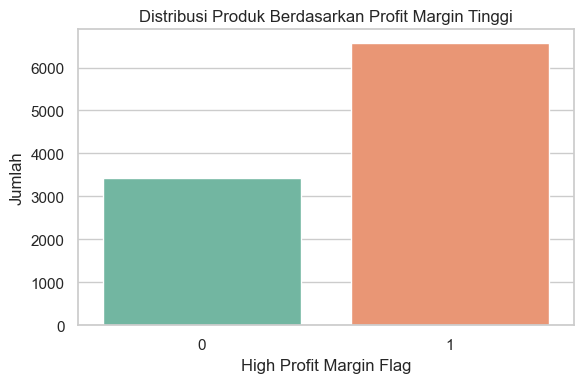

In [21]:
# 4. Segmentasi Profit Margin
# Tujuan: Mengidentifikasi produk atau pelanggan dengan margin tertinggi dan terendah

# a. Countplot: High_Profit_Margin_Flag
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='High_Profit_Margin_Flag', palette='Set2')
plt.title('Distribusi Produk Berdasarkan Profit Margin Tinggi')
plt.xlabel('High Profit Margin Flag')
plt.ylabel('Jumlah')
plt.tight_layout()
plt.show()

# Label 1 (High Profit Margin): Memiliki jumlah yang lebih tinggi, sekitar 6.500+ produk/transaksi.
# Label 0 (Low Profit Margin): Jumlahnya lebih rendah, sekitar 3.500 produk/transaksi.

# Mayoritas Produk Memberikan Margin Tinggi
# Lebih dari 65% produk berada dalam kategori margin tinggi (flag = 1), menunjukkan bahwa sebagian besar 
# penjualan memberikan kontribusi margin yang baik bagi perusahaan.
# Peluang Optimasi di Produk Bermargin Rendah
# Masih terdapat sekitar 35% produk/transaksi dengan margin rendah.
# Produk-produk ini dapat ditinjau ulang — apakah perlu dinaikkan harganya, dikurangi biayanya, atau 
# dikurangi promonya
# Segmentasi berdasarkan High_Profit_Margin_Flag dapat membantu menentukan prioritas produk untuk 
# dipromosikan, dipertahankan, atau bahkan dihentikan.

/var/folders/9_/06hc1w9969g8zktjcjcs_f6w0000gn/T/ipykernel_44268/921081424.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Product', y='Profit_Margin', palette='Set3')


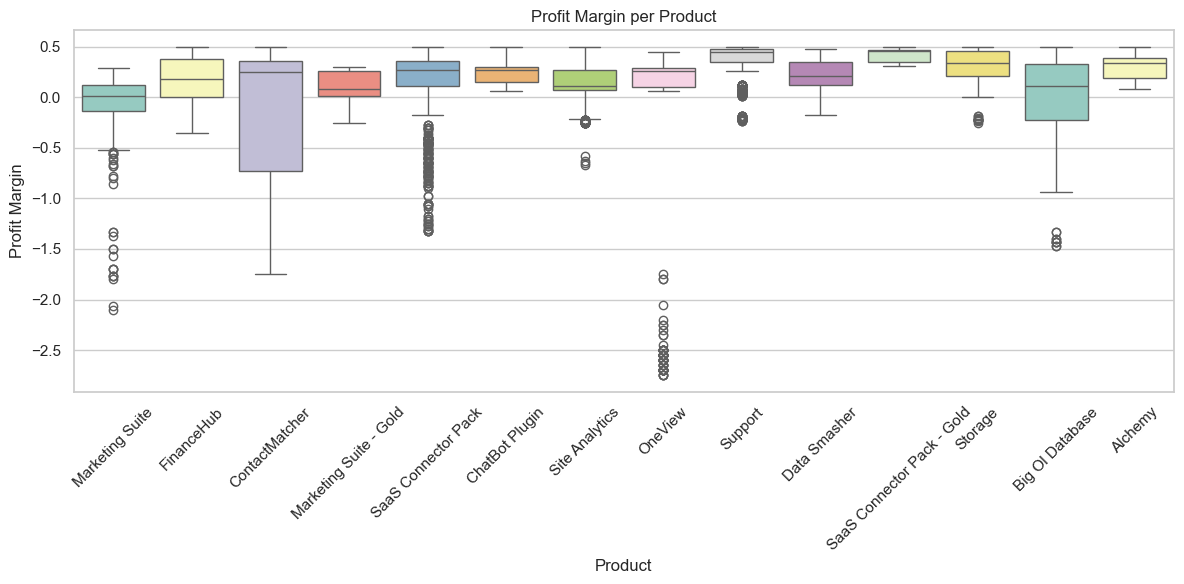

In [22]:
# b. Boxplot: Profit_Margin berdasarkan Kategori Produk
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Product', y='Profit_Margin', palette='Set3')
plt.title('Profit Margin per Product')
plt.xlabel('Product')
plt.ylabel('Profit Margin')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Produk dengan Profit Margin Tertinggi (Stabil)
# 1. Alchemy
# 2. SaaS Connector Pack – Gold
# 3. Storage
# 4. Data Smasher
# Memiliki profit margin yang stabil dan sepenuhnya positif, artinya produk-produk ini paling menguntungkan dan konsisten dalam menghasilkan margin.

# Produk dengan Profit Margin Negatif / Sangat Fluktuatif
# ContactMatcher memiliki sebaran margin paling luas dan banyak negatif, menunjukkan risiko tinggi atau biaya yang tidak efisien.
# Marketing Suite dan OneView juga memiliki margin negatif dan banyak outlier, yang bisa menjadi sinyal bahwa produk ini perlu evaluasi lebih dalam.

# Produk dengan Margin Positif Tapi Banyak Outlier Negatif
# 1. SaaS Connector Pack
# 2. Site Analytics memiliki margin utama positif, namun terdapat banyak outlier negatif. Ini menunjukkan ada transaksi-transaksi tertentu yang sangat merugikan.

/var/folders/9_/06hc1w9969g8zktjcjcs_f6w0000gn/T/ipykernel_44268/2204348721.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_customers, x='Customer_Total_Sales', y='Customer', palette='viridis')


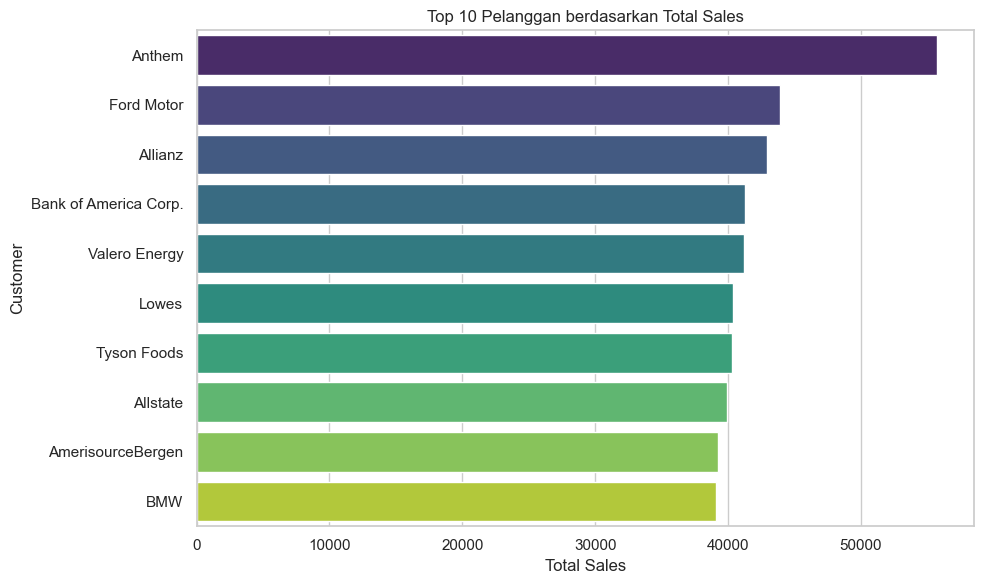

In [23]:
# 5. Analisis Pelanggan (Customer Analytics)
# Tujuan: Menemukan pelanggan loyal dan paling berkontribusi terhadap pendapatan

# a. Bar Chart – Top 10 Pelanggan berdasarkan Total Sales

# Ambil top 10 pelanggan dengan total sales tertinggi, berdasarkan kolom 'Customer'
top_customers = (
    df.groupby('Customer')['Customer_Total_Sales']
    .max()
    .sort_values(ascending=False)
    .head(10)
    .sort_values(ascending=False)  # urutkan dari terkecil ke terbesar
).reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_customers, x='Customer_Total_Sales', y='Customer', palette='viridis')
plt.title('Top 10 Pelanggan berdasarkan Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Customer')
plt.tight_layout()
plt.show()

/var/folders/9_/06hc1w9969g8zktjcjcs_f6w0000gn/T/ipykernel_44268/2709063194.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_order_customers.values, y=top_order_customers.index, palette='magma')


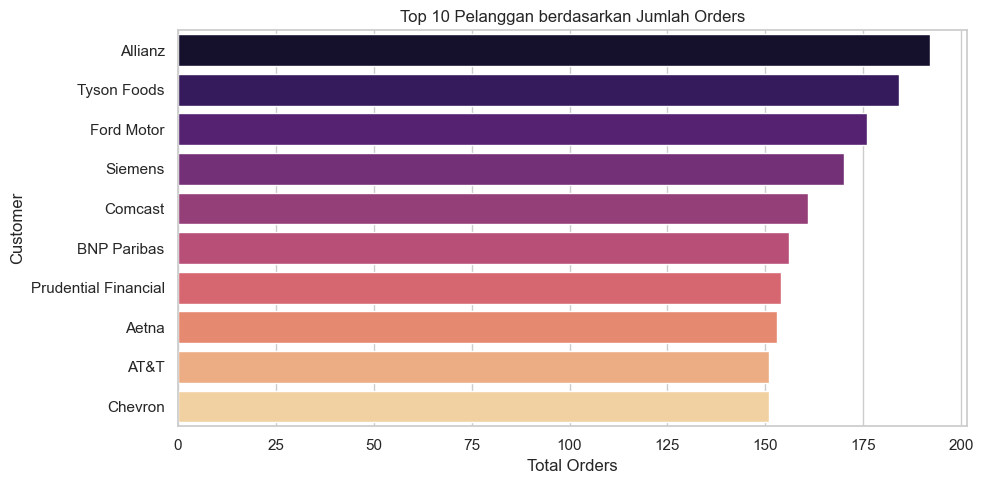

In [24]:
# b. Bar Chart – Top 10 Pelanggan berdasarkan Jumlah Orders
# Top 10 pelanggan dengan jumlah order terbanyak
top_order_customers = df.groupby('Customer')['Customer_Total_Orders'].max().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_order_customers.values, y=top_order_customers.index, palette='magma')
plt.title('Top 10 Pelanggan berdasarkan Jumlah Orders')
plt.xlabel('Total Orders')
plt.ylabel('Customer')
plt.tight_layout()
plt.show()

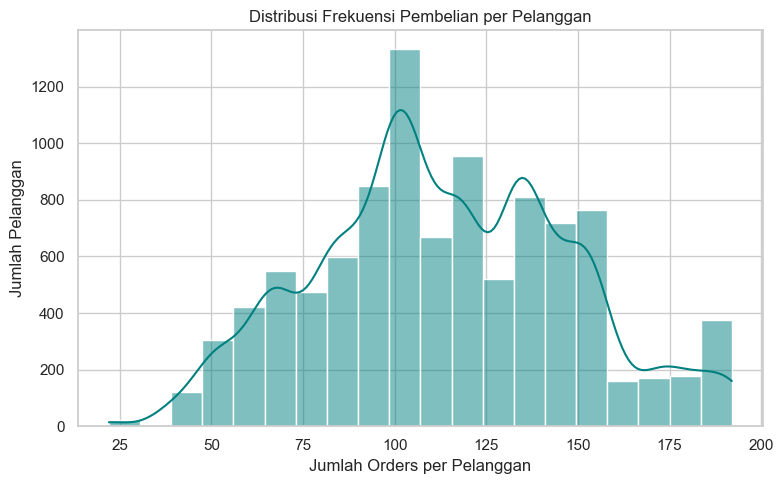

In [25]:
# c. Histogram – Distribusi Frekuensi Pembelian
# Top 10 pelanggan dengan jumlah order terbanyak
plt.figure(figsize=(8, 5))
sns.histplot(df['Customer_Total_Orders'], bins=20, kde=True, color='teal')
plt.title('Distribusi Frekuensi Pembelian per Pelanggan')
plt.xlabel('Jumlah Orders per Pelanggan')
plt.ylabel('Jumlah Pelanggan')
plt.tight_layout()
plt.show()

/var/folders/9_/06hc1w9969g8zktjcjcs_f6w0000gn/T/ipykernel_44268/3636958491.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Revenue_Category', palette='Set2', order=['High', 'Medium', 'Low'])


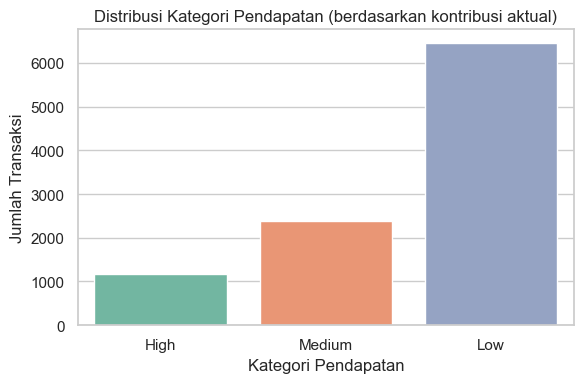

In [26]:
# 6. Revenue Category
# Tujuan: Mengelompokkan pelanggan atau produk berdasarkan besaran kontribusi pendapatan

# a. Countplot: Distribusi Revenue_Category

# 1. Total sales per customer
customer_sales = df.groupby('Customer')['Customer_Total_Sales'].sum().sort_values(ascending=False)

# 2. Hitung kontribusi kumulatif
cumulative_sales_pct = customer_sales.cumsum() / customer_sales.sum()

# 3. Segmentasi berdasarkan kontribusi
def revenue_segment(pct):
    if pct <= 0.2:
        return 'High'
    elif pct <= 0.5:
        return 'Medium'
    else:
        return 'Low'

# 4. Terapkan segmentasi
revenue_category = cumulative_sales_pct.apply(revenue_segment).rename('Revenue_Category')

# 5. Buat dataframe customer-level
customer_df = pd.DataFrame({
    'Customer': customer_sales.index,
    'Customer_Total_Sales': customer_sales.values,
    'Revenue_Category': revenue_category.values
})
# Hapus kolom Revenue_Category jika sudah ada
if 'Revenue_Category' in df.columns:
    df = df.drop(columns=['Revenue_Category'])

# Lanjutkan merge
df = df.merge(customer_df[['Customer', 'Revenue_Category']], on='Customer', how='left')

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Revenue_Category', palette='Set2', order=['High', 'Medium', 'Low'])
plt.title('Distribusi Kategori Pendapatan (berdasarkan kontribusi aktual)')
plt.xlabel('Kategori Pendapatan')
plt.ylabel('Jumlah Transaksi')
plt.tight_layout()
plt.show()

# Analisis Bisnis:
# Pelanggan High sangat penting untuk dipertahankan (misalnya dengan loyalty program).Pelanggan Low bisa menjadi target untuk peningkatan penjualan (misalnya dengan promosi khusus atau edukasi produk).
# Medium bisa jadi target upsell.

# Mayoritas pelanggan masuk dalam kategori Low
# Sekitar 6.500+ transaksi berasal dari pelanggan yang termasuk kategori Low Contributor 
# (kontribusi kumulatif di atas 50%).
# Kontribusi tertinggi (High) hanya berasal dari sedikit pelanggan
# Kurang dari 1.200 pelanggan menghasilkan 20% dari total pendapatan. Ini mencerminkan prinsip Pareto 80/20.
# Kategori Medium berada di tengah secara jumlah pelanggan (~2.400), berkontribusi 20–50% dari total pendapatan.

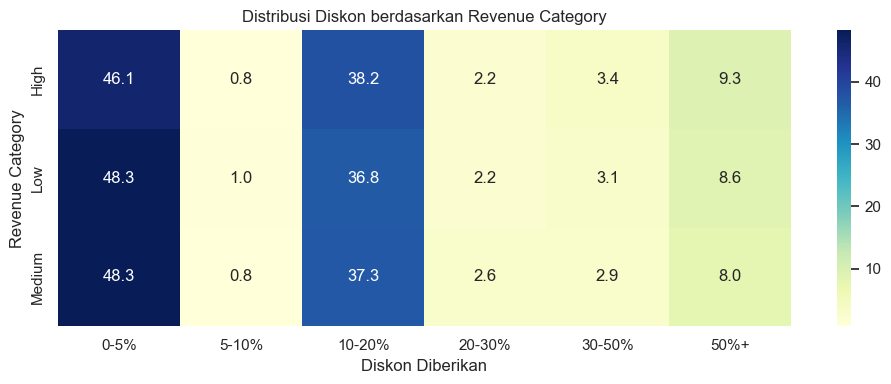

In [27]:
# Buat binning diskon baru berdasarkan kolom 'Discount'
df['Discount_Bin'] = pd.cut(
    df['Discount'],
    bins=[-0.01, 0.05, 0.10, 0.20, 0.30, 0.50, 1.0],
    labels=['0-5%', '5-10%', '10-20%', '20-30%', '30-50%', '50%+']
)

# Crosstab: normalisasi per Revenue_Category
ct_discount = pd.crosstab(df['Revenue_Category'], df['Discount_Bin'], normalize='index') * 100

# b. Plot heatmap
plt.figure(figsize=(10, 4))
sns.heatmap(ct_discount, annot=True, fmt='.1f', cmap='YlGnBu')
plt.title('Distribusi Diskon berdasarkan Revenue Category')
plt.xlabel('Diskon Diberikan')
plt.ylabel('Revenue Category')
plt.tight_layout()
plt.show()

# Diskon kecil (0–5%) mendominasi semua segmen
# Sekitar 46–48% dari semua kategori pelanggan (High, Medium, Low) paling sering menerima diskon minimal (0–5%).
# Artinya, mayoritas transaksi dilakukan dengan diskon ringan.

# Segmen High dan Medium menerima lebih banyak diskon besar (>30%) dibandingkan Low
# High Revenue Customers cenderung lebih sering mendapatkan diskon besar, terutama yang >50%.
# Ini masuk akal karena pelanggan besar kadang mendapat perlakuan spesial

# Diskon 10–20% cukup merata antar segmen
# Sekitar 36–38% dari semua kategori menerima diskon 10–20% → ini mungkin diskon umum yang diberikan dalam promo.

# Interpretasi Bisnis

# Segment:
# High: Lebih banyak menerima diskon tinggi, perlu hati-hati agar tidak over-subsidi
# Medium: Distribusi diskon mirip High, Evaluasi apakah mereka benar-benar menguntungkan
# Low: Banyak transaksi kecil dengan diskon rendah, bisa dipertimbangkan upsell/promosi volume transaksi

In [28]:
# 7. Sales per Unit dan Efisiensi
# Tujuan: Mengukur efisiensi produk dalam menghasilkan pendapatan per unit

# A. Hitung Kolom Sales_per_Unit dan Profit_Margin

# Hitung Sales per Unit
df['Sales_per_Unit'] = df['Sales'] / df['Quantity']

# Hitung Profit Margin
df['Profit_Margin'] = df['Profit'] / df['Sales']

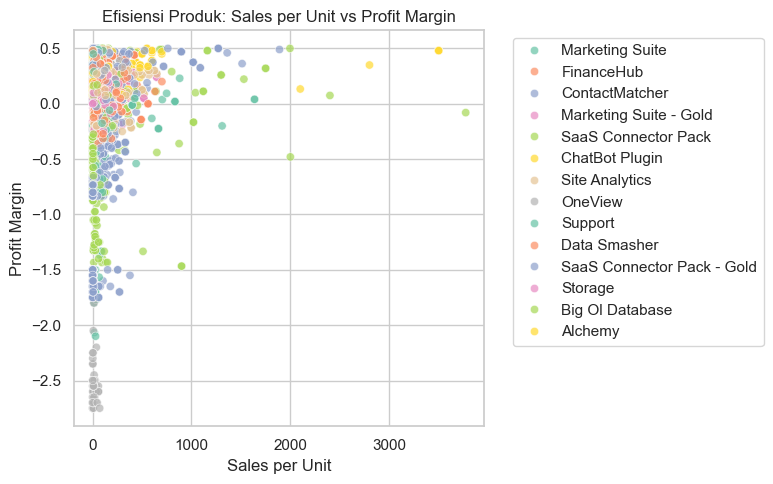

In [29]:
# a. Scatter Plot: Sales_per_Unit vs Profit_Margin
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=df,
    x='Sales_per_Unit',
    y='Profit_Margin',
    hue='Product',  # gunakan kolom yang ada
    palette='Set2',
    alpha=0.7
)
plt.title('Efisiensi Produk: Sales per Unit vs Profit Margin')
plt.xlabel('Sales per Unit')
plt.ylabel('Profit Margin')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Mayoritas produk terkonsentrasi di area sales rendah (0–300/unit)
# Sebagian besar titik berada di sebelah kiri (low sales) yang menunjukkan mayoritas produk memiliki penjualan per unit yang rendah.

# Profit Margin bervariasi, ada yang negatif
# Banyak produk memiliki profit margin < 0, artinya produk dijual rugi (cost > price).
# Beberapa bahkan sangat negatif (di bawah -2)

# Sedikit produk yang sangat efisien (high sales & high margin)
# Titik-titik paling kanan dan atas (produk Alchemy dan ChatBot Plugin) menunjukkan produk ideal:
# Penjualan tinggi
# Margin positif tinggi 

# Fokus pada produk yang efisien secara margin dan penjualan tinggi (seperti Alchemy, ChatBot Plugin).
# Audit biaya pada produk dengan margin negatif, evaluasi apakah perlu direvisi harganya atau efisiensi biaya ditingkatkan. 
# Tingkatkan promosi produk dengan margin tinggi tapi penjualannya rendah.

/var/folders/9_/06hc1w9969g8zktjcjcs_f6w0000gn/T/ipykernel_44268/3709407420.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


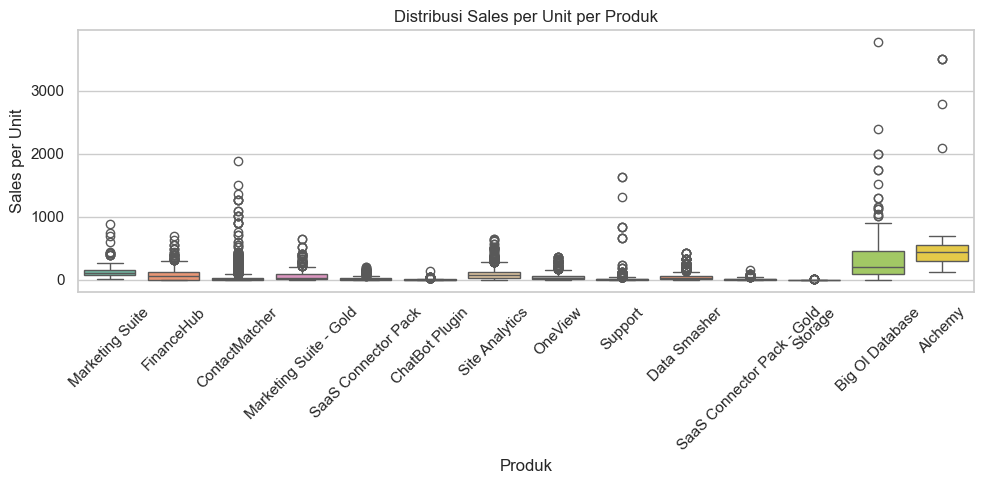

In [30]:
# b. Boxplot: Sales_per_Unit berdasarkan Produk
plt.figure(figsize=(10, 5))
sns.boxplot(
    data=df,
    x='Product',
    y='Sales_per_Unit',
    palette='Set2'
)
plt.title('Distribusi Sales per Unit per Produk')
plt.xlabel('Produk')
plt.ylabel('Sales per Unit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Produk dengan Penjualan Unit Tinggi
# Big Ol Database dan Alchemy secara signifikan memiliki median dan distribusi Sales per Unit yang lebih tinggi dibanding produk lain.
# Mereka juga memiliki jangkauan interkuartil (IQR) lebar, artinya penjualan cukup bervariasi antar pelanggan, tapi tetap dalam level tinggi.
# Implikasi: Produk ini sangat kompetitif, potensial sebagai core product atau unggulan bisnis.

# Mayoritas Produk Memiliki Median Penjualan Rendah
# Produk seperti SaaS Connector Pack, SaaS Connector Pack - Gold, Storage, dan Marketing Suite - Gold memiliki median sangat rendah.
# Hampir semua nilainya berkumpul di angka < 100 (bahkan mendekati 0).

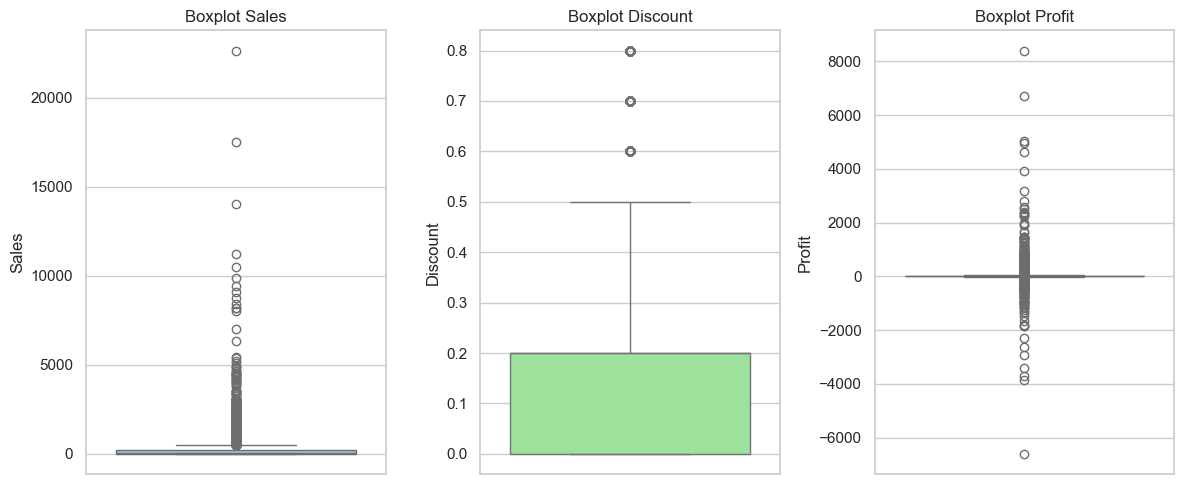

In [31]:
# 8. Outlier dalam Penjualan: Red Flag atau Golden Opportunity?
# Tujuan: Mengevaluasi anomali signifikan dalam data baik sebagai risiko maupun potensi

# a. Boxplot untuk Deteksi Outlier

# Boxplot untuk Sales, Discount, Profit
plt.figure(figsize=(12, 5))

# 1. Sales
plt.subplot(1, 3, 1)
sns.boxplot(data=df, y='Sales', color='skyblue')
plt.title('Boxplot Sales')

# 2. Discount
plt.subplot(1, 3, 2)
sns.boxplot(data=df, y='Discount', color='lightgreen')
plt.title('Boxplot Discount')

# 3. Profit
plt.subplot(1, 3, 3)
sns.boxplot(data=df, y='Profit', color='salmon')
plt.title('Boxplot Profit')

plt.tight_layout()
plt.show()

# Boxplot Sales
# Sebaran penjualan sangat rendah, mayoritas transaksi di bawah 1.000.
# Banyak outlier ekstrem hingga >20.000 artinya ada beberapa transaksi yang sangat besar.
# Kesimpulan:
# Produk/segmen tertentu mungkin memiliki potensi penjualan sangat tinggi.

# Boxplot Discount
# Diskon terbanyak di antara 0% sampai 20%.
# Terdapat beberapa outlier hingga 80%.
# Kesimpulan:
# Mayoritas penjualan tidak terlalu bergantung pada diskon.Namun, diskon yang tinggi (di atas 50%) perlu ditinjau apakah efektif? atau justru merugikan margin?

# Boxplot Profit
# Sebaran profit simetris tapi sangat bervariasi.
# Banyak outlier negatif hingga -6000, menunjukkan kerugian besar pada beberapa transaksi.
# Ada juga profit sangat tinggi (>8000) di sisi lain.
# Kesimpulan:
# Struktur profit rentan: bisa sangat untung atau sangat rugi.

In [32]:
# b. Highlight & Hitung Outlier Ekstrem (Z-Score Method)

from scipy.stats import zscore

# Hitung z-score untuk kolom yang dianalisis
df['Z_Sales'] = zscore(df['Sales'])
df['Z_Profit'] = zscore(df['Profit'])
df['Z_Discount'] = zscore(df['Discount'])
# Menambahkan tiga kolom baru ke dataframe df, masing-masing berisi nilai z-score dari Sales, Profit, dan 
# Discount. Z-Score mengukur sejauh mana nilai menyimpang dari rata-rata (dalam satuan standar deviasi).


# Tentukan threshold outlier (biasanya > 3 atau < -3)
sales_outliers = df[(df['Z_Sales'].abs() > 3)]
profit_outliers = df[(df['Z_Profit'].abs() > 3)]
discount_outliers = df[(df['Z_Discount'].abs() > 3)]
# Filter data untuk mencari outlier ekstrem, yaitu:
# Nilai yang lebih dari 3 standar deviasi dari rata-rata (positif atau negatif).
# Menggunakan .abs() agar nilai negatif juga ikut dihitung.

# Tampilkan jumlah
print(f"Jumlah outlier Sales: {len(sales_outliers)}")
print(f"Jumlah outlier Profit: {len(profit_outliers)}")
print(f"Jumlah outlier Discount: {len(discount_outliers)}")

# Sales dan Profit punya outlier yang cukup banyak, tapi masih relatif wajar dalam konteks data 
# penjualan (transaksi besar, revenue melonjak, atau kerugian tinggi).
# Discount memiliki outlier paling banyak (300 baris), menunjukkan ada banyak nilai diskon yang sangat ekstrem 

Jumlah outlier Sales: 127
Jumlah outlier Profit: 107
Jumlah outlier Discount: 300


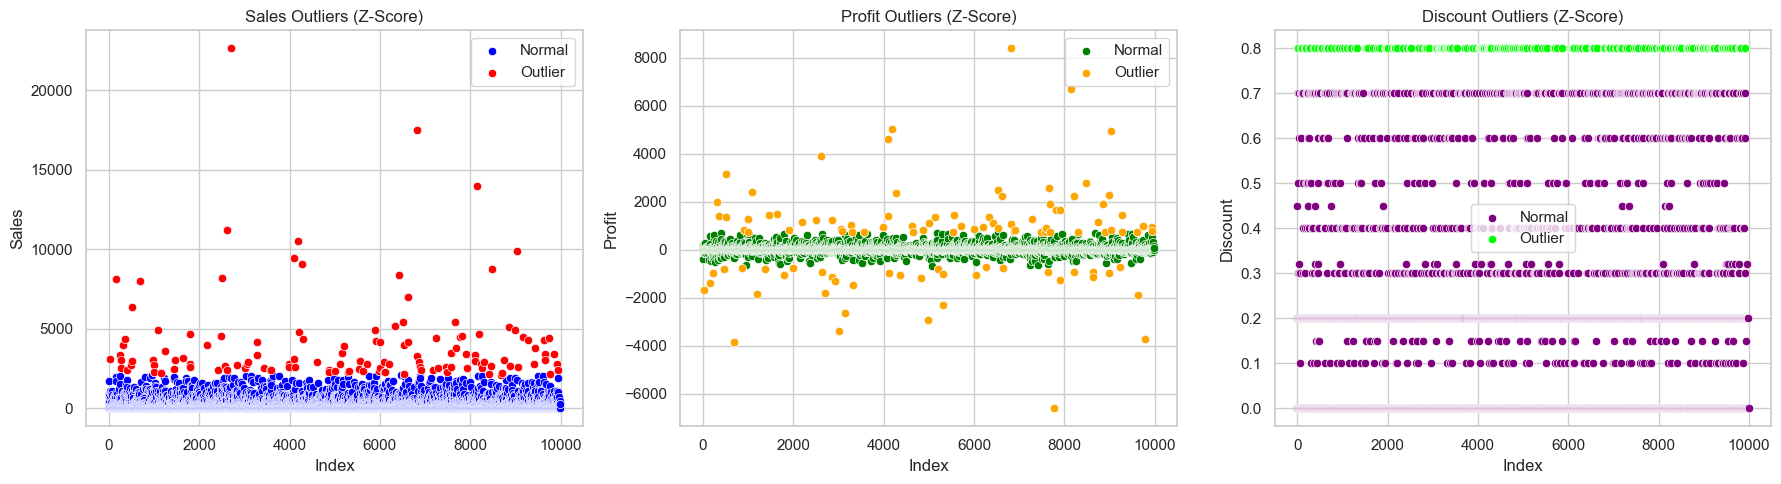

In [62]:
# visualisasi outlier hasil Z-Score

# Atur ukuran plot
plt.figure(figsize=(18, 5))

# Plot 1: Sales Outlier
plt.subplot(1, 3, 1)
sns.scatterplot(x=df.index, y=df['Sales'], color='blue', label='Normal')
sns.scatterplot(x=sales_outliers.index, y=sales_outliers['Sales'], color='red', label='Outlier')
plt.title('Sales Outliers (Z-Score)')
plt.xlabel('Index')
plt.ylabel('Sales')

# Plot 2: Profit Outlier
plt.subplot(1, 3, 2)
sns.scatterplot(x=df.index, y=df['Profit'], color='green', label='Normal')
sns.scatterplot(x=profit_outliers.index, y=profit_outliers['Profit'], color='orange', label='Outlier')
plt.title('Profit Outliers (Z-Score)')
plt.xlabel('Index')
plt.ylabel('Profit')

# Plot 3: Discount Outlier
plt.subplot(1, 3, 3)
sns.scatterplot(x=df.index, y=df['Discount'], color='purple', label='Normal')
sns.scatterplot(x=discount_outliers.index, y=discount_outliers['Discount'], color='lime', label='Outlier')
plt.title('Discount Outliers (Z-Score)')
plt.xlabel('Index')
plt.ylabel('Discount')

plt.tight_layout()
plt.show()

In [33]:
# c. Analisis: Siapa mereka? (Red Flag atau Golden Opportunity?)

# Cek beberapa contoh data dari outlier sales
sales_outliers[['Customer', 'Sales', 'Profit', 'Discount', 'Segment', 'Product']].sort_values(by='Sales', ascending=False).head(10)

# Menampilkan 10 data teratas dari outlier penjualan (Sales) yang telah dideteksi sebelumnya 
# menggunakan Z-Score method, diurutkan dari penjualan tertinggi.

# Kolom yang ditampilkan:

# Customer: Nama pelanggan
# Sales: Nilai penjualan (yang dianggap outlier)
# Profit: Keuntungan dari transaksi tersebut
# Discount: Besarnya diskon
# Segment: Segmen pelanggan
# Product: Nama produk

# 1. Z-Score berhasil menangkap outlier yang logis
# Semua data ini memang memiliki nilai penjualan yang sangat besar, sehingga wajar dianggap outlier 
# secara statistik.

# 2. Diskon tidak selalu tinggi
# Sebagian besar transaksi tidak memiliki diskon besar — contohnya:
# Coca-Cola (0.0), Mondelez (0.0), Lowes (0.0)
# Namun Anthem dan BMW punya diskon cukup tinggi (0.5 dan 0.4), dan menariknya:
# Transaksi Anthem yang terbesar malah rugi besar: Profit -1,811.08
# Mungkin disebabkan diskon terlalu besar atau kesalahan harga.

# 3. Segmentasi: Banyak dari SMB dan Enterprise
# Banyak outlier berasal dari SMB (Small-Medium Business) dan Enterprise, mengindikasikan bahwa transaksi besar bisa berasal dari kedua segmen.

# 4. Produk Alchemy dan Big Ol Database mendominasi
# Produk-produk ini sering muncul di daftar outlier:
# Bisa berarti produk premium/mahal
# Atau sering dijual dalam kuantitas besar

# Analisa: 
# Coca-Cola dan Mondelez memiliki penjualan besar dan profit tinggi, Golden opportunity
# Tapi Anthem (diskon tinggi, rugi besar), Red flag atau pricing issue

,Customer,Sales,Profit,Discount,Segment,Product
2697,Anthem,22638.480,-1811.0784,0.5,Enterprise,Big Ol Database
6826,Coca-Cola,17499.950,8399.9760,0.0,Strategic,Alchemy
8153,Mondelez International,13999.960,6719.9808,0.0,SMB,Alchemy
2623,Trafigura Group,11199.968,3919.9888,0.2,Enterprise,Alchemy
4190,Lowes,10499.970,5039.9856,0.0,SMB,Alchemy
9039,Valero Energy,9892.740,4946.3700,0.0,SMB,ContactMatcher
4098,Anthem,9449.950,4630.4755,0.0,SMB,ContactMatcher
4277,Lowes,9099.930,2365.9818,0.0,Strategic,Big Ol Database
8488,Honda Motor,8749.950,2799.9840,0.0,SMB,Big Ol Database
6425,BMW,8399.976,1119.9968,0.4,SMB,Alchemy


In [34]:
# d. Apakah yang memiliki outlier adalah segmen Corporate / Enterprise?
sales_outliers['Segment'].value_counts(normalize=True)

# SMB (Small-Medium Business) mendominasi outlier dengan 48%, disusul oleh Strategic (31%) dan Enterprise (21%).
# Artinya:
# SMB memiliki beberapa pelanggan yang melakukan transaksi besar tidak biasa.

Segment
SMB           0.480315
Strategic     0.307087
Enterprise    0.212598
Name: proportion, dtype: float64

In [35]:
# e. Apakah Discount yang tinggi menyebabkan profit negatif?
# Transaksi dengan profit negatif
negative_profit = df[df['Profit'] < 0]

# Rata-rata diskon pada transaksi rugi
print("Rata-rata diskon (rugi):", negative_profit['Discount'].mean())

# Bandingkan dengan rata-rata diskon semua
print("Rata-rata diskon (semua):", df['Discount'].mean())

# Korelasi antara Diskon dan Profit
# Ya, diskon tinggi berkontribusi besar terhadap profit negatif.

# Diskon pada transaksi rugi hampir 3x lebih besar dari rata-rata diskon keseluruhan.
# Ini menunjukkan bahwa diskon ekstrem (>40-50%) sangat berisiko menyebabkan kerugian.
# Red Flag: diskon diberikan terlalu besar tanpa pertimbangan profitabilitas.
# Perlu kebijakan diskon yang lebih bijak, terutama untuk produk/segmen dengan margin kecil.

# Rata-rata diskon pada transaksi yang menghasilkan kerugian (profit < 0) adalah 0.48, jauh lebih tinggi dibandingkan rata-rata diskon dari seluruh transaksi yaitu 0.15.
# Diskon yang tinggi berkontribusi signifikan terhadap kerugian.
# Memberikan diskon mendekati 50% pada produk tertentu kemungkinan besar mengurangi margin keuntungan secara drastis hingga menyebabkan kerugian.
# Strategi pricing atau promosi perusahaan perlu ditinjau ulang untuk memastikan diskon besar hanya diberikan pada produk dengan margin tinggi atau sebagai bagian dari strategi upselling/cross-selling.

Rata-rata diskon (rugi): 0.48088722608230894
Rata-rata diskon (semua): 0.15620272163297977


In [36]:
# f. Apakah outlier berasal dari 1-2 pelanggan yang mendominasi penjualan?

# Cek pelanggan dengan sales outlier
top_customers = sales_outliers['Customer'].value_counts().head(5)

print(top_customers)

# Total proporsi dari 5 pelanggan terbesar di outlier
total_outlier = sales_outliers.shape[0]
proporsi = top_customers.sum() / total_outlier
print(f"Proporsi dari 5 pelanggan terbesar di outlier: {proporsi:.2%}")

# 5 pelanggan teratas di data outlier:
# Lukoil, BMW, Bank of America Corp., Daimler, Tyson Foods
# Mereka hanya menyumbang 14.96% dari total outlier.
# Interpretasi:

# Tidak, outlier tidak didominasi hanya oleh 1–2 pelanggan.
# Meskipun beberapa pelanggan besar muncul cukup sering, penyebaran outlier masih relatif merata.
# Tidak ada satu atau dua pelanggan yang secara ekstrem menyebabkan outlier.
# Artinya, anomali tidak terkonsentrasi, tapi tersebar, bisa jadi karena faktor diskon, kesalahan input, atau jenis produk tertentu.

Customer
Lukoil                   5
BMW                      4
Bank of America Corp.    4
Daimler                  3
Tyson Foods              3
Name: count, dtype: int64
Proporsi dari 5 pelanggan terbesar di outlier: 14.96%


In [37]:
# g. Apakah ada indikasi kesalahan input (misal diskon 100%)?
# Cek diskon ekstrem
extreme_discount = df[df['Discount'] >= 0.99]

print(extreme_discount[['Customer', 'Product', 'Sales', 'Profit', 'Discount']])

# Hasil:

# Tidak ditemukan data dengan diskon 100%.
# Tidak ada entri yang mencurigakan seperti Discount = 1.0 atau Sales > 0 tapi Profit = 0 dengan Discount = 100%.
# Interpretasi:
# Tidak ada indikasi kesalahan input ekstrim seperti diskon 100%.
# Artinya, data diskon terlihat wajar secara teknis, meskipun beberapa diskon tinggi memang menyebabkan kerugian (profit negatif).

Empty DataFrame
Columns: [Customer, Product, Sales, Profit, Discount]
Index: []


In [38]:
 # 9. Analisis RFM (Recency, Frequency, Monetary)

import pandas as pd
import datetime as dt

# Pastikan Order Date dalam format datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Tentukan tanggal acuan untuk menghitung recency
snapshot_date = df['Order Date'].max() + pd.Timedelta(days=1)

# Hitung nilai RFM
rfm = df.groupby('Customer').agg({
    'Order Date': lambda x: (snapshot_date - x.max()).days,  # Recency
    'Order ID': 'nunique',                                   # Frequency
    'Sales': 'sum'                                           # Monetary
}).reset_index()

rfm.columns = ['Customer', 'Recency', 'Frequency', 'Monetary']

# Skor RFM (1-4)
rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4,3,2,1]).astype(int)
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, labels=[1,2,3,4]).astype(int)
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 4, labels=[1,2,3,4]).astype(int)

# Gabungkan skor menjadi satu segmen
rfm['RFM_Segment'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

# Optional: Tambahkan label kategori
def rfm_level(df):
    if df['RFM_Segment'] == '444':
        return 'Best Customers'
    elif df['R_Score'] >= 3:
        return 'Loyal'
    elif df['F_Score'] >= 3:
        return 'Frequent'
    elif df['M_Score'] >= 3:
        return 'High-Value'
    else:
        return 'Others'

rfm['RFM_Level'] = rfm.apply(rfm_level, axis=1)

# Gabungkan hasil RFM ke dataset utama
df = df.merge(rfm[['Customer', 'Recency', 'Frequency', 'Monetary', 'RFM_Segment', 'RFM_Level']], 
              on='Customer', 
              how='left')

# Lihat hasil
rfm.head(10)

,Customer,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,RFM_Level
0,AT&T,10,67,29462.3240,3,4,3,343,Loyal
1,Abbott Laboratories,13,31,12617.1140,2,1,1,211,Others
2,Aetna,22,76,27278.5930,2,4,3,243,Frequent
3,Airbus,28,58,29798.5930,1,3,4,134,Frequent
4,Allianz,2,102,42904.1670,4,4,4,444,Best Customers
5,Allstate,2,61,39941.6400,4,4,4,444,Best Customers
6,Alphabet,7,24,16116.4610,3,1,2,312,Loyal
7,Amazon,14,62,23189.2165,2,4,3,243,Frequent
8,American Express,8,71,33514.9210,3,4,4,344,Loyal
9,AmerisourceBergen,4,68,39234.7610,4,4,4,444,Best Customers


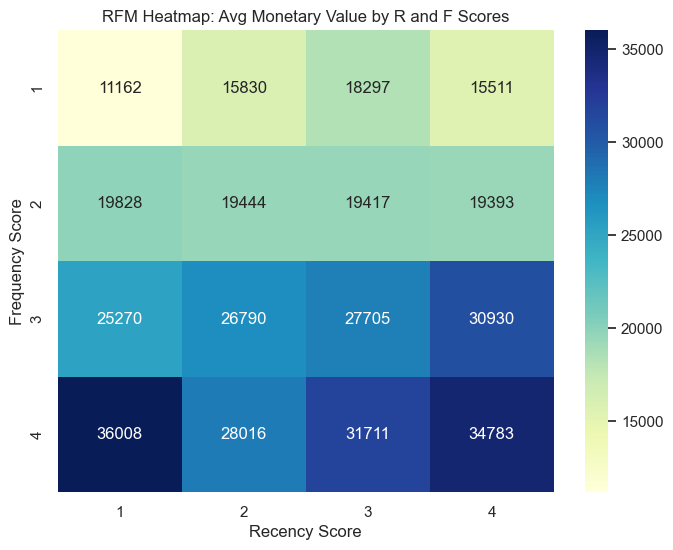

In [39]:
# a. Heatmap RFM Segmentation (Pivot Table)

import seaborn as sns
import matplotlib.pyplot as plt

# Pivot table untuk heatmap RFM segmentasi
rfm_pivot = rfm.pivot_table(index='F_Score', columns='R_Score', values='Monetary', aggfunc='mean')

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(rfm_pivot, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title('RFM Heatmap: Avg Monetary Value by R and F Scores')
plt.xlabel('Recency Score')
plt.ylabel('Frequency Score')
plt.show()

# Heatmap ini menampilkan rata-rata nilai pembelian (Monetary) berdasarkan kombinasi skor:
# Recency Score (R): Seberapa baru terakhir kali pelanggan membeli (4 = paling baru).
# Frequency Score (F): Seberapa sering pelanggan melakukan pembelian (4 = paling sering).

# Semakin tinggi skor F dan R → semakin tinggi nilai rata-rata pembelian (Monetary)
# Misal:
# Skor F = 4 dan R = 1 → 36.008 (tertinggi)
# Skor F = 4 dan R = 4 → 34.783
# Artinya: Pelanggan yang paling sering dan baru-baru ini membeli, cenderung menghasilkan pendapatan 
# lebih tinggi.

# Skor R rendah (lama tidak belanja) + F rendah (jarang belanja) = nilai pembelian kecil
# Contoh: R = 1, F = 1 → Rp11.162
# Segmen ini adalah target churn yang paling besar dan nilai kontribusinya kecil.

# Frekuensi lebih menentukan dari Recency
# Misalnya:
# F=4 R=1 → 36.008 (tertinggi)
# F=4 R=4 → 34.783
# F=1 R=4 → 15.511 → jauh lebih rendah, meskipun baru belanja
# Frekuensi pembelian lebih memengaruhi nilai transaksi daripada seberapa baru mereka terakhir belanja.

# Pelanggan dengan skor F tinggi (≥3) menghasilkan nilai transaksi tertinggi, prioritaskan untuk retensi dan loyalti pelanggan sering belanja
# Segmen F rendah & R rendah = nilai sangat rendah	Potensi churn, bisa jadi tidak perlu ditargetkan secara intensif

/var/folders/9_/06hc1w9969g8zktjcjcs_f6w0000gn/T/ipykernel_44268/2041461831.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=rfm, x='RFM_Level', order=rfm['RFM_Level'].value_counts().index, palette='Set2')


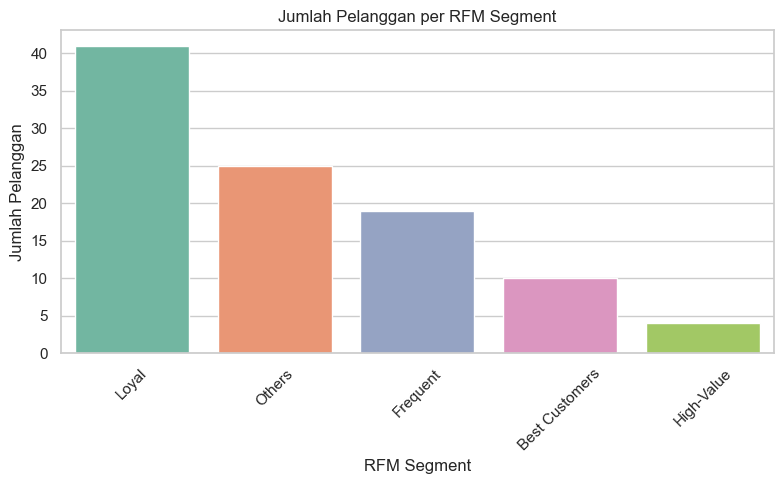

In [40]:
# b. Barplot: Jumlah Pelanggan per RFM Segment

# Plot bar chart untuk jumlah pelanggan per RFM level
plt.figure(figsize=(8,5))
sns.countplot(data=rfm, x='RFM_Level', order=rfm['RFM_Level'].value_counts().index, palette='Set2')
plt.title('Jumlah Pelanggan per RFM Segment')
plt.xlabel('RFM Segment')
plt.ylabel('Jumlah Pelanggan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Segmen Loyal adalah yang Terbesar:
# Sekitar 40 pelanggan masuk dalam kategori Loyal.
# Artinya, banyak pelanggan yang secara konsisten melakukan pembelian (frekuensinya tinggi) meskipun nilai pembeliannya bisa bervariasi.
# Ini adalah segmen penting untuk dipertahankan melalui program loyalitas, diskon khusus, atau early-access.

# Segmen Others Juga Signifikan:
# Sekitar 25 pelanggan masuk dalam kategori Others.
# Kemungkinan besar ini mencakup pelanggan baru, pasif, atau yang tidak masuk dalam kategori prioritas lain.Perlu strategi edukasi dan aktivasi.

# Segmen Frequent (sering belanja tapi mungkin nilai rendah):
# Sekitar 18 pelanggan, menunjukkan perilaku konsisten tapi mungkin belum profitable.
# Peluang untuk up-sell atau cross-sell agar meningkatkan nilai transaksi.

# Segmen Best Customers & High-Value:
# Best Customers: Sekitar 10 pelanggan.
# High-Value: Hanya sekitar 4 pelanggan, tapi kemungkinan memiliki kontribusi revenue terbesar per transaksi.
# Dua segmen ini adalah prioritas utama untuk retensi, dengan pendekatan personalisasi tinggi dan layanan premium.

In [41]:
# 10. Perhitungan Customer Lifetime Value (CLV)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Pastikan kolom tanggal dalam format datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Hitung total sales dan jumlah order per customer
clv_df = df.groupby('Customer').agg({
    'Sales': 'sum',
    'Order Date': [lambda x: (x.max() - x.min()).days + 1, 'count']
})

clv_df.columns = ['Total_Sales', 'Customer_Lifespan_Days', 'Total_Orders']
clv_df.reset_index(inplace=True)

# Hindari pembagi nol
clv_df['Customer_Lifespan_Days'] = clv_df['Customer_Lifespan_Days'].replace(0, 1)

# Hitung CLV sederhana (rata-rata sales per hari selama masa aktif)
clv_df['CLV'] = clv_df['Total_Sales'] / clv_df['Customer_Lifespan_Days']

# Merge kembali ke dataframe utama jika perlu
df = df.merge(clv_df[['Customer', 'CLV']], on='Customer', how='left')

# Mengubah kolom 'Order Date' menjadi format tanggal (datetime).
# Mengelompokkan data berdasarkan pelanggan (Customer) dan menghitung:
# Total_Sales: Total penjualan per pelanggan.
# Customer_Lifespan_Days: Selisih hari antara transaksi pertama dan terakhir.
# Total_Orders: Jumlah total pesanan per pelanggan.
# Menghindari pembagian nol dengan mengganti lifespan 0 menjadi 1.
# Ini merupakan rata-rata kontribusi revenue per hari selama lifespan pelanggan.
# Jika CLV 18.7 maka setiap harinya, pelanggan tersebut menghasilkan rata-rata revenue sebesar 18.7 satuan mata uang

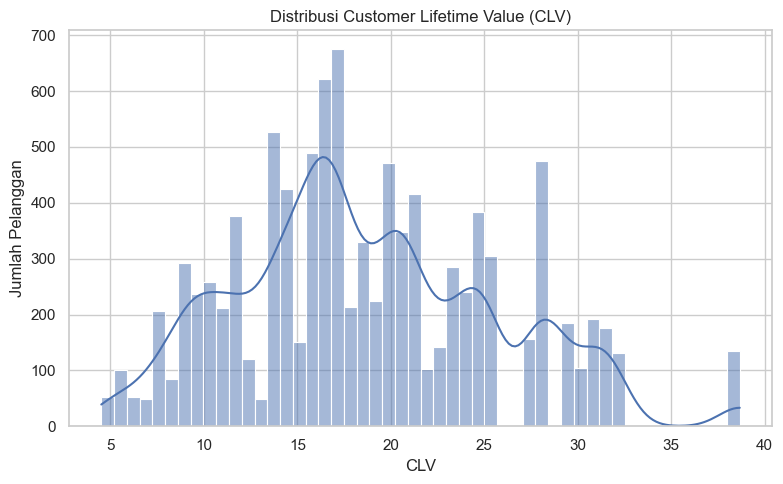

In [42]:
# a. Histogram Distribusi CLV

plt.figure(figsize=(8,5))
sns.histplot(df['CLV'], bins=50, kde=True)
plt.title('Distribusi Customer Lifetime Value (CLV)')
plt.xlabel('CLV')
plt.ylabel('Jumlah Pelanggan')
plt.tight_layout()
plt.show()

# Sebagian besar pelanggan memiliki CLV di kisaran 15–20, dengan puncak sekitar 17–18 CLV.
# Distribusi bersifat right-skewed (condong ke kanan), menunjukkan:
# Banyak pelanggan memiliki CLV rendah hingga sedang.
# Hanya sebagian kecil yang memiliki CLV tinggi (di atas 30).
# Beberapa anomalies atau outlier muncul di CLV mendekati 40, yang bisa menjadi pelanggan bernilai tinggi (high-value customers).
# Garis KDE (kurva biru) menunjukkan multi-modality (lebih dari satu puncak), yang mengindikasikan adanya berbagai kelompok pelanggan dengan pola nilai CLV yang berbeda.

/var/folders/9_/06hc1w9969g8zktjcjcs_f6w0000gn/T/ipykernel_44268/3599579853.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=clv_by_segment, x='CLV', y='Segment', palette='viridis')


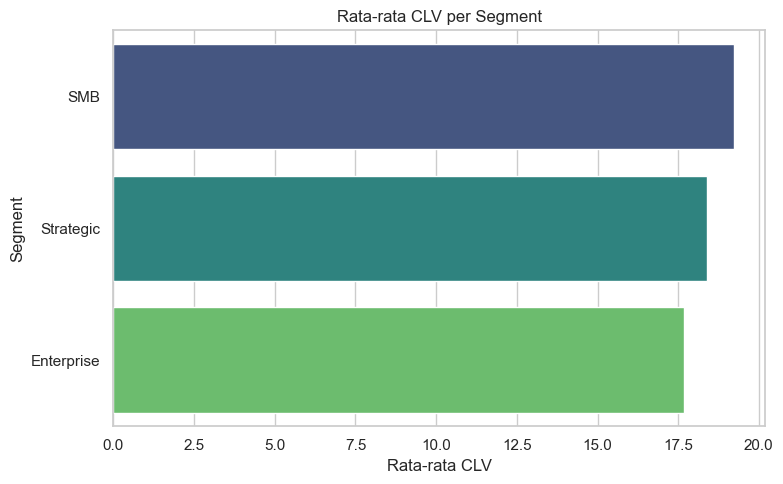

In [43]:
# b. Barplot Rata-rata CLV per Segment

# CLV rata-rata per Segment
clv_by_segment = df.groupby('Segment')['CLV'].mean().reset_index().sort_values(by='CLV', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(data=clv_by_segment, x='CLV', y='Segment', palette='viridis')
plt.title('Rata-rata CLV per Segment')
plt.xlabel('Rata-rata CLV')
plt.ylabel('Segment')
plt.tight_layout()
plt.show()

In [44]:
# c. Pelanggan terbaik berdasarkan CLV
top_customers = clv_df.sort_values(by='CLV', ascending=False).head(10)
print(top_customers[['Customer', 'CLV', 'Total_Sales', 'Customer_Lifespan_Days']])

                 Customer        CLV  Total_Sales  Customer_Lifespan_Days
10                 Anthem  38.667044   55719.2100                    1441
16  Bank of America Corp.  32.080830   41255.9471                    1286
38             Ford Motor  31.509722   43893.0424                    1393
4                 Allianz  31.000121   42904.1670                    1384
92          Valero Energy  30.109875   41220.4188                    1369
89            Tyson Foods  29.200828   40326.3440                    1381
5                Allstate  28.307328   39941.6400                    1411
55                  Lowes  28.145162   40360.1630                    1434
13                    BMW  28.077435   39083.7900                    1392
9       AmerisourceBergen  27.944986   39234.7610                    1404


In [45]:
# 11. Menghitung Churn Rate
# Seorang customer dianggap churn jika tidak ada pembelian ulang dalam 180 hari.

# 1. Ambil transaksi terakhir per customer
last_tx = df.groupby('Customer')['Order Date'].max().reset_index()
last_tx.columns = ['Customer', 'Last_Order_Date']

# 2. Hitung jumlah hari sejak transaksi terakhir
snapshot_date = df['Order Date'].max()
last_tx['Days_Since_Last_Order'] = (snapshot_date - last_tx['Last_Order_Date']).dt.days

# 3. Anggap churn jika >90 hari tidak beli
last_tx['Churn_Flag'] = (last_tx['Days_Since_Last_Order'] > 90).astype(int)

# 4. Gabungkan ke df utama jika perlu
df = df.merge(last_tx[['Customer', 'Churn_Flag']], on='Customer', how='left')

# Mengidentifikasi dan menganalisis perilaku customer yang berhenti bertransaksi (churn) dalam periode 
# tertentu, agar bisa diambil langkah strategis berdasarkan segmen tertentu.
# Menentukan tanggal terakhir pembelian tiap customer.
# Mengukur jarak waktu (dalam hari) dari tanggal terakhir transaksi hingga hari terakhir pada dataset.
# Menandai customer churn jika tidak melakukan pembelian lagi dalam lebih dari 180 hari.
# Menggabungkan informasi churn ke data utama.
# Menganalisis churn rate berdasarkan segmentasi pelanggan

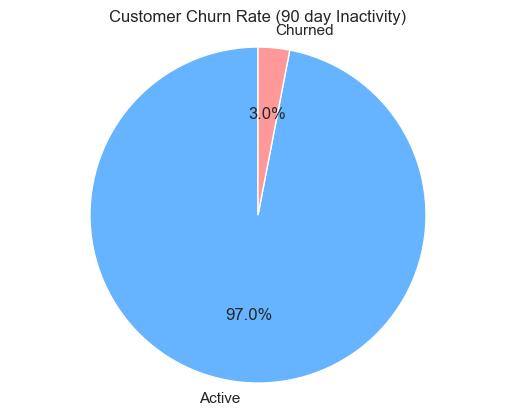

In [46]:
# a. Pie chart churn vs active

import matplotlib.pyplot as plt

labels = ['Active', 'Churned']
sizes = last_tx['Churn_Flag'].value_counts().sort_index()

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
plt.title('Customer Churn Rate (90 day Inactivity)')
plt.axis('equal')
plt.show()

# Retention Pelanggan Sangat Tinggi
# Dengan churn rate serendah 3%, ini menunjukkan bahwa pelanggan SaaS kamu sangat loyal atau rutin melakukan pembelian/renewal.

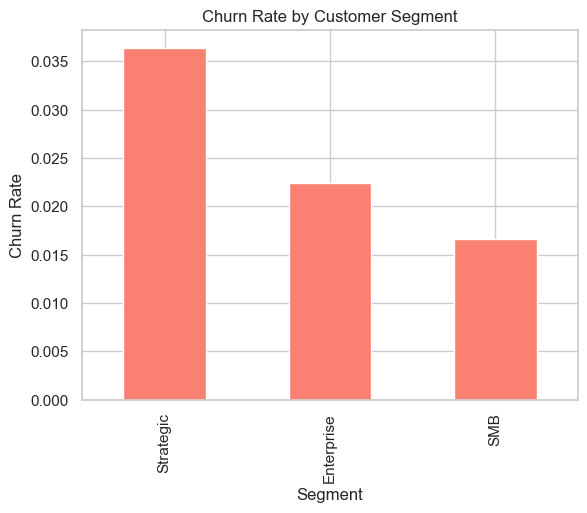

In [47]:
# b. Churn Rate by Segment

churn_segment = df.groupby('Segment')['Churn_Flag'].mean().sort_values(ascending=False)

churn_segment.plot(kind='bar', color='salmon')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Customer Segment')
plt.show()

# Pelanggan Strategis Lebih Rentan Churn
# Meski dinamakan Strategic, segmen ini justru memiliki tingkat kehilangan pelanggan tertinggi.
# Hal ini bisa jadi indikasi bahwa ekspektasi mereka lebih tinggi atau ada ketidaksesuaian antara produk 
# dan kebutuhan mereka.(Lakukan survei atau interview untuk pahami alasan churn mereka)

# SMB Relatif Lebih Loyal
# Small & Medium Business (SMB) menunjukkan churn rate paling rendah.

# Meskipun pelanggan Strategic sering kali dianggap paling penting, mereka justru memiliki churn rate 
# tertinggi. Perlu strategi retensi khusus seperti engagement deeper, personalisasi, atau penguatan 
# onboarding untuk segmen ini.

In [48]:
# Statistik Deskriptif dan Korelasi
# Bagian ini bertujuan untuk memberikan gambaran umum tentang karakteristik data penjualan melalui ukuran statistik seperti rata-rata, median, dan sebaran. 
# Selain itu, analisis korelasi membantu mengidentifikasi hubungan antar variabel utama—seperti antara diskon, penjualan, dan profit—untuk menemukan pola yang dapat mendukung pengambilan keputusan bisnis.

In [49]:
# D. Statistik Deskriptif

import pandas as pd
import numpy as np

# 1. Statistik Deskriptif dasar
desc = df[['Sales', 'Profit', 'Profit_Margin', 'Discount', 'Quantity']].describe()
print("Statistik Deskriptif:\n", desc)

# a. Skewness antara mean vs median (indikasi skewed)
sales_mean = df['Sales'].mean()
sales_median = df['Sales'].median()
print(f"\nSales - Mean: {sales_mean:.2f}, Median: {sales_median:.2f}")
print("→ Data Sales kemungkinan *skewed* jika mean jauh lebih besar dari median.")

# b. Maksimum sales
max_sales = df['Sales'].max()
print(f"Maximum Sales (Outlier potential): {max_sales:.2f}")

# c. Profit & Profit Margin: nilai negatif
neg_profit_count = (df['Profit'] < 0).sum()
total_count = df.shape[0]
neg_margin_count = (df['Profit_Margin'] < 0).sum()
print(f"\nJumlah transaksi dengan profit negatif: {neg_profit_count} ({neg_profit_count/total_count:.2%})")
print(f"Jumlah transaksi dengan profit margin negatif: {neg_margin_count} ({neg_margin_count/total_count:.2%})")

# d. Median Margin
print(f"Mean Profit Margin: {df['Profit_Margin'].mean():.2f}")
print(f"Median Profit Margin: {df['Profit_Margin'].median():.2f}")

# e. Distribusi Diskon
print(f"\nRata-rata Diskon: {df['Discount'].mean():.2f}")
print(f"Diskon Maksimum: {df['Discount'].max():.2f}")

# f. Bandingkan rata-rata diskon antara untung vs rugi
diskon_rugi = df[df['Profit'] < 0]['Discount'].mean()
diskon_untung = df[df['Profit'] > 0]['Discount'].mean()
print(f"Rata-rata diskon (rugi): {diskon_rugi:.2f}")
print(f"Rata-rata diskon (untung): {diskon_untung:.2f}")

# g. Quantity: bulk purchase atau tidak
print(f"\nQuantity - Mean: {df['Quantity'].mean():.2f}, Median: {df['Quantity'].median():.2f}, Max: {df['Quantity'].max()}")
bulk_count = (df['Quantity'] > df['Quantity'].quantile(0.95)).sum()
print(f"Jumlah transaksi dengan pembelian besar (top 5% quantity): {bulk_count}")

# h. Korelasi antara sales dan profit
corr_sales_profit = df[['Sales', 'Profit']].corr().iloc[0, 1]
print(f"\nKorelasi antara Sales dan Profit: {corr_sales_profit:.2f}")

# Hitung jumlah transaksi per nilai diskon
discount_counts = df.groupby(df['Discount'].round(2)).size().reset_index(name='count')

# Urutkan berdasarkan jumlah terbanyak
discount_counts_sorted = discount_counts.sort_values(by='count', ascending=False).head(50)

# Tampilkan hasil
print("\nDiskon Paling Sering Digunakan:")
for i, row in discount_counts_sorted.iterrows():
    print(f"- Diskon {row['Discount']:.0%} digunakan sebanyak {row['count']} transaksi")


# Discount Tinggi Berkontribusi pada Profit Negatif
# Rata-rata diskon pada transaksi rugi: 0.48
# Rata-rata diskon keseluruhan: 0.16
# Rata-rata diskon pada transaksi untung: 0.08
# Kesimpulan: Diskon yang tinggi sangat berkontribusi terhadap kerugian. Artinya, semakin besar diskon yang diberikan, semakin besar risiko perusahaan mengalami kerugian.

# Distribusi Data Sales Sangat Skewed
# Mean Sales: 229.86
# Median Sales: 54.49
# Maksimum Sales: 22,638.48
# Kesimpulan: Data sales sangat right-skewed, ditandai oleh nilai maksimum yang jauh lebih besar dari median. 
# Ini menandakan bahwa ada beberapa transaksi dengan nilai sangat tinggi (outlier).

# Profit Margin Umumnya Positif, Tapi Tidak Merata
# Mean Profit Margin: 0.12
# Median Profit Margin: 0.27
# Jumlah transaksi dengan profit margin negatif: 1,871 (18.72%)
# Kesimpulan: Meskipun sebagian besar transaksi untung, hampir 1 dari 5 transaksi justru merugi. 
# Ini perlu perhatian khusus terutama dari sisi kebijakan diskon dan pricing.

# Quantity Tidak Terlalu Variatif, Tapi Ada Extreme Buyers
# Mean Quantity: 3.79
# Max Quantity: 14
# Top 5% Quantity (>9): 428 transaksi
# Kesimpulan: Mayoritas pembelian berada di kisaran rendah, tapi ada sekelompok kecil pelanggan yang membeli dalam jumlah besar. 
# Potensi segmentasi dan strategi loyalitas bisa difokuskan pada mereka.

# Korelasi Sales dan Profit Sedang (0.48)
# Kesimpulan: Ada hubungan positif antara sales dan profit, tapi tidak sangat kuat. Artinya, menaikkan 
# penjualan belum tentu langsung meningkatkan profit — tergantung faktor seperti diskon, margin, dan biaya lain.

# Insight Bisnis:
# Hindari pemberian diskon berlebihan tanpa perhitungan margin.
# Fokus pada transaksi besar yang profitable, bukan sekadar sales tinggi.
# Segmentasi berdasarkan kuantitas pembelian dan diskon sensitif bisa membantu meningkatkan profitabilitas.

Statistik Deskriptif:
               Sales       Profit  Profit_Margin     Discount     Quantity
count   9994.000000  9994.000000    9994.000000  9994.000000  9994.000000
mean     229.858001    28.656896       0.120314     0.156203     3.789574
std      623.245101   234.260108       0.466754     0.206452     2.225110
min        0.444000 -6599.978000      -2.750000     0.000000     1.000000
25%       17.280000     1.728750       0.075000     0.000000     2.000000
50%       54.490000     8.666500       0.270000     0.200000     3.000000
75%      209.940000    29.364000       0.362500     0.200000     5.000000
max    22638.480000  8399.976000       0.500000     0.800000    14.000000

Sales - Mean: 229.86, Median: 54.49
→ Data Sales kemungkinan *skewed* jika mean jauh lebih besar dari median.
Maximum Sales (Outlier potential): 22638.48

Jumlah transaksi dengan profit negatif: 1871 (18.72%)
Jumlah transaksi dengan profit margin negatif: 1871 (18.72%)
Mean Profit Margin: 0.12
Median Profit M

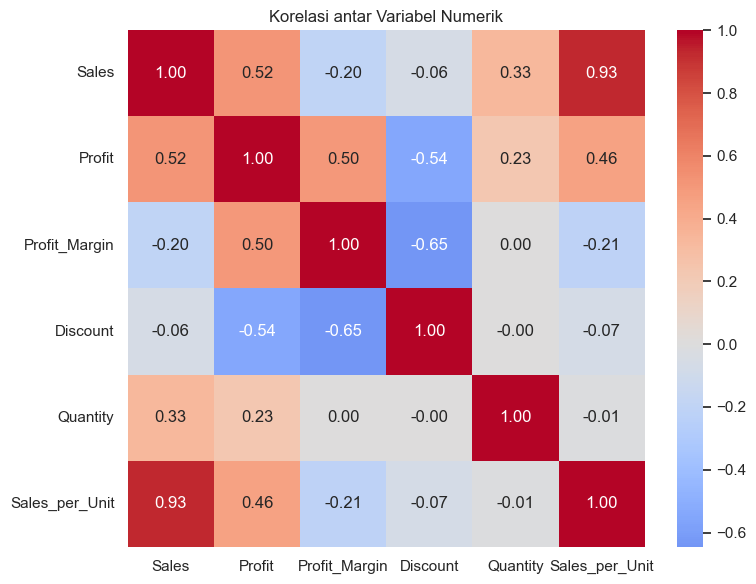

In [50]:
# 2. Korelasi antar Variabel Numerik
import seaborn as sns
import matplotlib.pyplot as plt

# Daftar kolom yang ingin dianalisis
cols = ['Sales', 'Profit', 'Profit_Margin', 'Discount', 'Quantity', 'Sales_per_Unit']

# Hitung korelasi
corr_matrix = df[cols].corr(method='spearman')

# Visualisasi heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title("Korelasi antar Variabel Numerik")
plt.tight_layout()
plt.show()

# Korelasi Tinggi (positif)
# Sales terhadap Sales_per_Unit: 0.93
# Hubungan sangat kuat dan positif. Artinya, semakin tinggi harga per unit, semakin besar total sales.
# Ini masuk akal karena Sales = Quantity × Sales_per_Unit.
# Sales terhadap Profit: 0.52
# Korelasi sedang–kuat. Penjualan cenderung berbanding lurus dengan keuntungan, namun tidak 100%, karena 
# faktor lain (diskon, margin).
# Profit terhadap Profit_Margin: 0.50
# Korelasi sedang. Meskipun margin tinggi biasanya menghasilkan profit tinggi, hal ini tetap bergantung 
# pada volume penjualan.

# Korelasi Negatif
# Profit_Margin terhadap Discount: -0.65
# Korelasi negatif kuat. Semakin besar diskon, semakin kecil margin keuntungan.
# Wajar karena diskon menekan margin laba.
# Profit terhadap Discount: -0.54
# Korelasi negatif sedang. Memberi diskon besar cenderung mengurangi profit.
# Tapi efeknya tidak sekuat pengaruh diskon terhadap margin.
# Profit_Margin terhadap Sales: -0.20
# Korelasi negatif lemah. Penjualan tinggi tidak selalu menghasilkan margin tinggi. Bisa jadi karena diskon 
# atau biaya produk.

# Korelasi Lemah atau Tidak Signifikan
# Quantity tidak terlalu berkorelasi dengan variabel lain:
# Quantity terhadap Profit: 0.23
# Quantity terhadap Sales: 0.33
# Quantity terhadap Margin: 0.00
# Artinya: banyak menjual unit belum tentu menghasilkan profit/margin tinggi.
# Discount hampir tidak berkorelasi dengan Quantity (0.00), artinya diskon tidak diberikan berdasarkan banyaknya produk yang dibeli.

In [51]:
# 3. Statistik per Segment
segment_detail = df.groupby('Segment').agg({
    'Sales': ['mean', 'sum'],
    'Profit': ['mean', 'sum'],
    'Profit_Margin': 'mean',
    'Discount': 'mean',
    'Customer': 'nunique'
}).sort_values(('Profit', 'mean'), ascending=False)

display(segment_detail)

# 1. Rata-rata Profit per Transaksi

# Enterprise menghasilkan profit rata-rata tertinggi per transaksi: 33.82, meskipun jumlah pelanggan lebih sedikit (76).
# SMB adalah yang paling rendah secara profit per transaksi (25.84) — ini bisa menjadi sinyal efisiensi atau pricing perlu dievaluasi.

# 2. Total Volume (Sales & Profit)

# SMB menyumbang total Sales terbesar: 1.16 juta dan total Profit terbesar: 134K.
# Ini artinya SMB adalah kontributor volume terbesar, tapi lebih banyak main di kuantitas, bukan efisiensi.

# 3. Diskon vs Margin

# Enterprise justru punya Profit Margin tertinggi (14.3%), padahal diskonnya cukup tinggi (14.7%).
# SMB dan Strategic memiliki margin lebih rendah (11–12%), meski diskonnya hanya sedikit lebih kecil.

# 4. Jumlah Pelanggan

# Segment SMB paling banyak pelanggannya (96 customers), artinya market luas tapi profit per pelanggan lebih kecil.

Sales                   Profit              Profit_Margin  \
                  mean           sum       mean          sum          mean   
Segment                                                                      
Enterprise  240.972041  4.296531e+05  33.818664   60298.6785      0.142870   
Strategic   233.823300  7.061464e+05  30.456667   91979.1340      0.121203   
SMB         223.733644  1.161401e+06  25.836873  134119.2092      0.112050   

            Discount Customer  
                mean  nunique  
Segment                        
Enterprise  0.147128       76  
Strategic   0.158228       91  
SMB         0.158141       96

,Segment,Avg_Sales,Total_Sales,Avg_Profit,Total_Profit,Avg_Profit_Margin,Avg_Discount,Unique_Customers
0,Enterprise,240.972041,4.296531e+05,33.818664,60298.6785,0.142870,0.147128,76
1,Strategic,233.823300,7.061464e+05,30.456667,91979.1340,0.121203,0.158228,91
2,SMB,223.733644,1.161401e+06,25.836873,134119.2092,0.112050,0.158141,96


/var/folders/9_/06hc1w9969g8zktjcjcs_f6w0000gn/T/ipykernel_44268/183497855.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Segment', y='Avg_Sales', data=segment_detail, ax=axes[0, 0], palette='Blues_d')
/var/folders/9_/06hc1w9969g8zktjcjcs_f6w0000gn/T/ipykernel_44268/183497855.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Segment', y='Avg_Profit', data=segment_detail, ax=axes[0, 1], palette='Greens_d')
/var/folders/9_/06hc1w9969g8zktjcjcs_f6w0000gn/T/ipykernel_44268/183497855.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.bar

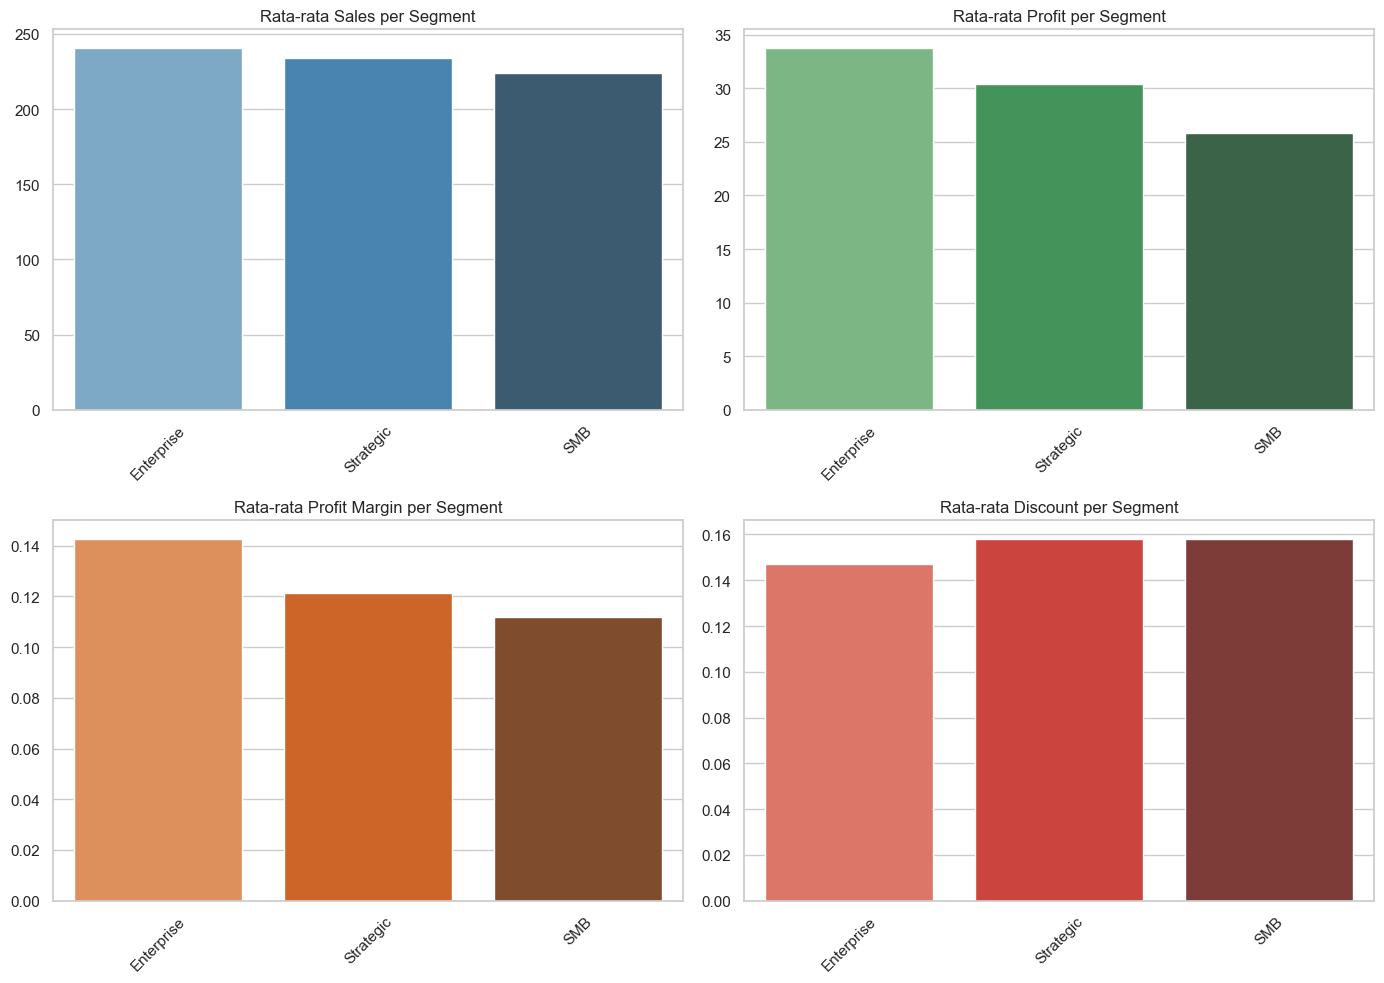

In [59]:
# Agregasi statistik per Segment
segment_detail = df.groupby('Segment').agg({
    'Sales': ['mean', 'sum'],
    'Profit': ['mean', 'sum'],
    'Profit_Margin': 'mean',
    'Discount': 'mean',
    'Customer': 'nunique'
}).sort_values(('Profit', 'mean'), ascending=False)

# Perbaiki nama kolom multi-index
segment_detail.columns = ['Avg_Sales', 'Total_Sales', 
                          'Avg_Profit', 'Total_Profit', 
                          'Avg_Profit_Margin', 'Avg_Discount', 
                          'Unique_Customers']
segment_detail = segment_detail.reset_index()

# Tampilkan tabel statistik
display(segment_detail)

# Set style visual
sns.set(style="whitegrid")

# Visualisasi: Barplot per metrik
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Rata-rata Sales
sns.barplot(x='Segment', y='Avg_Sales', data=segment_detail, ax=axes[0, 0], palette='Blues_d')
axes[0, 0].set_title('Rata-rata Sales per Segment')

# Rata-rata Profit
sns.barplot(x='Segment', y='Avg_Profit', data=segment_detail, ax=axes[0, 1], palette='Greens_d')
axes[0, 1].set_title('Rata-rata Profit per Segment')

# Margin Profit Rata-rata
sns.barplot(x='Segment', y='Avg_Profit_Margin', data=segment_detail, ax=axes[1, 0], palette='Oranges_d')
axes[1, 0].set_title('Rata-rata Profit Margin per Segment')

# Diskon Rata-rata
sns.barplot(x='Segment', y='Avg_Discount', data=segment_detail, ax=axes[1, 1], palette='Reds_d')
axes[1, 1].set_title('Rata-rata Discount per Segment')

# Layout rapih
for ax in axes.flat:
    ax.set_ylabel('')
    ax.set_xlabel('')
    for label in ax.get_xticklabels():
        label.set_rotation(45)

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Rata-rata')

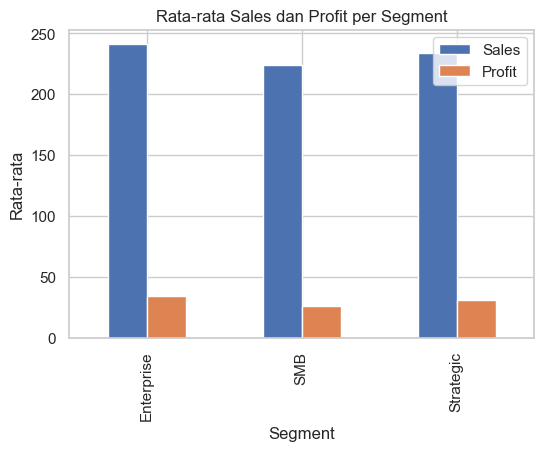

In [52]:
# D. Insight Bisnis
# 1.  Customer & Segment Insight

# a. Barplot rata-rata Sales & Profit per Segment
df.groupby('Segment')[['Sales', 'Profit']].mean().plot(kind='bar', figsize=(6,4))
plt.title('Rata-rata Sales dan Profit per Segment')
plt.ylabel('Rata-rata')

# Kode menampilkan barplot dari rata-rata Sales dan Profit untuk masing-masing segmen pelanggan 
# (Enterprise, SMB, Strategic).
# Visualisasi dibuat dari hasil groupby('Segment') kemudian dihitung mean() untuk kolom Sales dan Profit.

# Segmen Enterprise memimpin baik dari sisi rata-rata penjualan (Sales) maupun keuntungan (Profit).
# Strategic memiliki profit kedua tertinggi, dan Sales juga cukup tinggi, menunjukkan segmen ini juga cukup potensial.
# SMB (Small & Medium Business) tetap menjadi segmen dengan performa rata-rata terendah, baik dari sisi Sales maupun Profit.

# Enterprise adalah segmen paling bernilai, baik dari sisi volume transaksi maupun profit yang dihasilkan.
# Strategic bisa jadi target pertumbuhan, karena mendekati performa Enterprise.
# SMB perlu pendekatan khusus, misalnya bundling, diskon volume, atau edukasi produk untuk meningkatkan profitabilitasnya.

Text(0, 0.5, '')

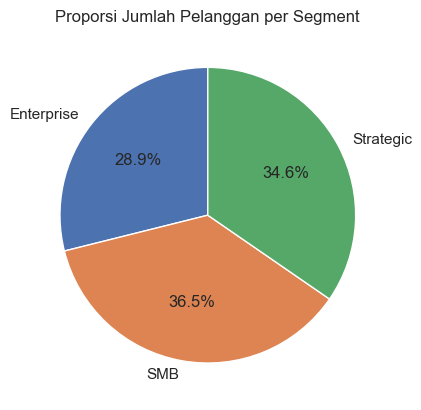

In [53]:
# b. Pie Chart distribusi jumlah pelanggan per Segment
df.groupby('Segment')['Customer'].nunique().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Proporsi Jumlah Pelanggan per Segment')
plt.ylabel('')

# SMB (Small & Medium Business) adalah segmen dengan jumlah pelanggan terbanyak, mencakup lebih dari sepertiga total pelanggan.
# Strategic menyusul di posisi kedua, dan Enterprise memiliki jumlah pelanggan paling sedikit.

# Enterprise = pelanggan sedikit, profit tinggi maka segmen sangat bernilai secara ekonomi.
# Fokus pada retensi dan upsell di segmen ini sangat direkomendasikan.
    
# SMB = pelanggan banyak, profit rendah maka segmen ini potensial jika dapat dioptimalkan.
# Perlu strategi efisiensi, automasi, atau penyesuaian harga/biaya akuisisi.
    
# Strategic = proporsi tengah maka segmen ini stabil dan bisa dikembangkan lebih lanjut untuk menyaingi Enterprise.

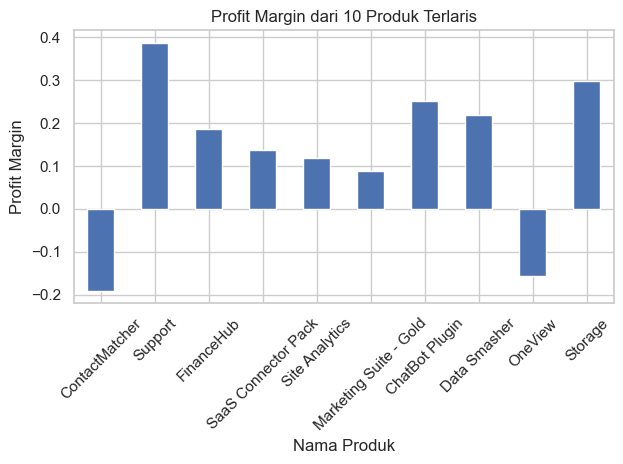

In [54]:
# 2. Product & Sales Insight

# Barplot Rata-rata Profit Margin vs Produk Terlaris

top_products = df.groupby('Product').agg({
    'Quantity': 'sum',
    'Profit_Margin': 'mean'
}).sort_values('Quantity', ascending=False).head(10)

top_products.plot(kind='bar', y='Profit_Margin', legend=False)
plt.title('Profit Margin dari 10 Produk Terlaris')
plt.ylabel('Profit Margin')
plt.xlabel('Nama Produk')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 1. Tidak semua produk terlaris memberikan margin tinggi.
# ContactMatcher dan OneView termasuk dalam 10 produk dengan jumlah penjualan tertinggi (kuantitas besar), namun justru memiliki profit margin negatif. Ini mengindikasikan kerugian per unit.

# 2. Produk dengan penjualan tinggi dan margin tinggi adalah aset utama.
# Support, Storage, dan ChatBot Plugin menunjukkan profit margin > 20% dan masuk dalam daftar produk dengan volume penjualan tinggi. Produk ini sangat ideal secara finansial.

# 3. Produk berperforma tinggi secara margin tapi perlu dilihat volume penjualannya.
# Support punya margin tertinggi (sekitar 38%), menunjukkan pricing dan cost yang sangat efisien.
# Tapi perlu dicek lebih lanjut apakah kontribusinya terhadap total profit juga besar, atau sekadar margin besar dari volume kecil.

Text(0.5, 1.0, 'Distribusi Diskon: Untung vs Rugi')

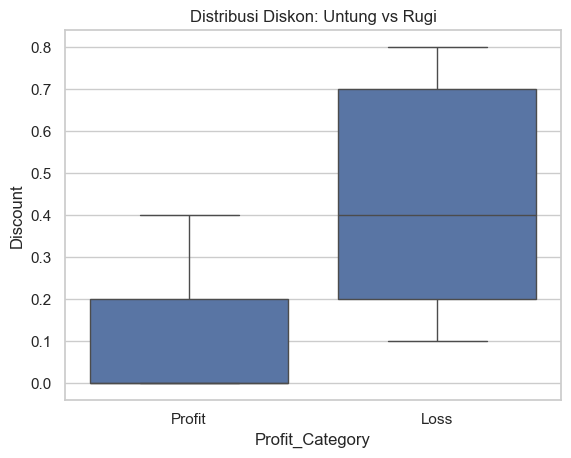

In [55]:
# 3. Promo & Profitability Insight

# Boxplot Discount untuk Profit Negatif vs Positif

df['Profit_Category'] = np.where(df['Profit'] < 0, 'Loss', 'Profit')
sns.boxplot(data=df, x='Profit_Category', y='Discount')
plt.title('Distribusi Diskon: Untung vs Rugi')

# Rata-rata diskon untuk transaksi yang rugi hampir 3x lebih tinggi dibanding transaksi untung.
# Korelasi negatif kuat antara Discount dan Profit Margin → indikasi bahwa diskon terlalu agresif.

/var/folders/9_/06hc1w9969g8zktjcjcs_f6w0000gn/T/ipykernel_44268/500031509.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Has_Discount', y='Profit', estimator='mean', palette='Set2')


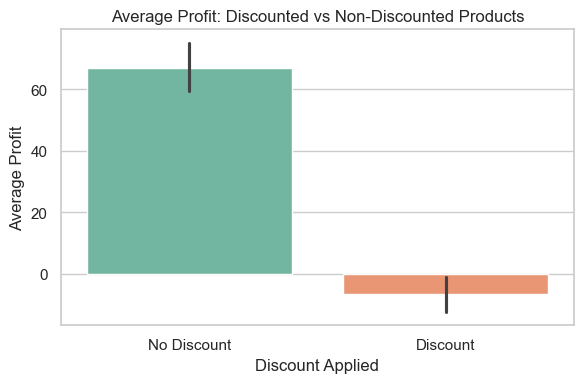

In [60]:
# Bar Chart: Rata-rata Profit untuk Produk Diskon vs Tidak Diskon

# Bar Chart rata-rata Profit
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='Has_Discount', y='Profit', estimator='mean', palette='Set2')
plt.title('Average Profit: Discounted vs Non-Discounted Products')
plt.xlabel('Discount Applied')
plt.ylabel('Average Profit')
plt.xticks([0, 1], ['No Discount', 'Discount'])
plt.tight_layout()
plt.show()

# Produk tanpa diskon (No Discount) memiliki rata-rata profit yang jauh lebih tinggi, sekitar $67 per transaksi.
# Produk dengan diskon (Discount) justru menunjukkan rata-rata profit negatif, artinya per transaksi menghasilkan kerugian rata-rata.
# Rekomendasi: Tinjau kembali kebijakan diskon, pastikan hanya digunakan untuk produk dengan margin tinggi atau sebagai bagian dari strategi upselling.

/var/folders/9_/06hc1w9969g8zktjcjcs_f6w0000gn/T/ipykernel_44268/586744585.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Has_Discount', y='Profit', palette='Set3')


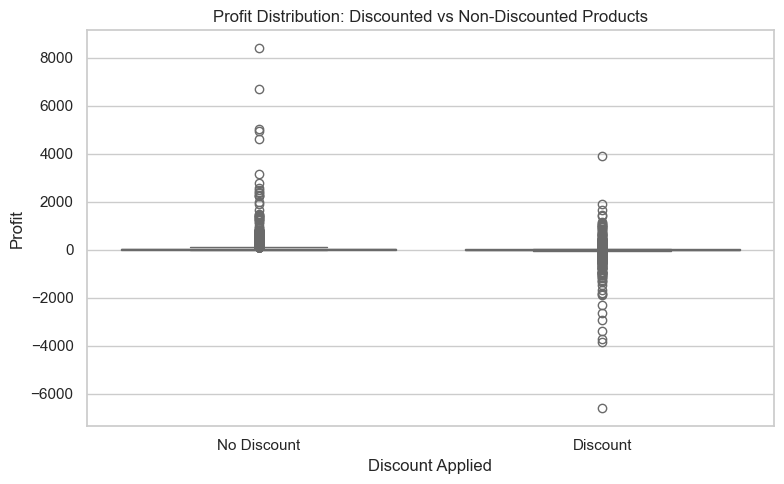

In [61]:
# Side-by-Side Boxplot: Distribusi Profit

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Has_Discount', y='Profit', palette='Set3')
plt.title('Profit Distribution: Discounted vs Non-Discounted Products')
plt.xlabel('Discount Applied')
plt.ylabel('Profit')
plt.xticks([0, 1], ['No Discount', 'Discount'])
plt.tight_layout()
plt.show()

# Kedua kategori (No Discount dan Discount) memiliki distribusi profit yang sangat menyebar, ditunjukkan oleh banyaknya outlier points (titik-titik di luar box).
# Pada kategori Discount, terlihat lebih banyak outlier negatif (losses), termasuk outlier ekstrem (di bawah -6000). 
# Ini menunjukkan risiko kerugian lebih besar saat diskon diberikan.
# Median profit untuk “No Discount” lebih tinggi dibanding “Discount”. Artinya, secara umum, transaksi tanpa diskon menghasilkan keuntungan lebih baik.
# Ini menyiratkan bahwa memberikan diskon belum tentu efektif dalam meningkatkan profitabilitas.

In [56]:
# Informasi umum dataset
df.info()

# Statistik deskriptif akhir
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 47 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Row ID                   9994 non-null   int64         
 1   Order ID                 9994 non-null   object        
 2   Order Date               9994 non-null   datetime64[ns]
 3   Date Key                 9994 non-null   int64         
 4   Contact Name             9994 non-null   object        
 5   Country                  9994 non-null   object        
 6   City                     9994 non-null   object        
 7   Region                   9994 non-null   object        
 8   Subregion                9994 non-null   object        
 9   Customer                 9994 non-null   object        
 10  Customer ID              9994 non-null   int64         
 11  Industry                 9994 non-null   object        
 12  Segment                  9994 non-

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,Invoice_Month,Invoice_Year,Invoice_Weekday,Discount_Applied,Profit_Margin,High_Profit_Margin_Flag,Sales_per_Unit,Customer_Total_Orders,Customer_Total_Sales,Invoice_YearMonth,Country_Total_Sales,Country_Profit,Day_of_Week,Month,Has_Discount,Discount_Bin,Revenue_Category,Z_Sales,Z_Profit,Z_Discount,Recency,Frequency,Monetary,RFM_Segment,RFM_Level,CLV,Churn_Flag,Profit_Category
count,9994.000000,9994,9994,9.994000e+03,9994,9994,9994,9994,9994,9994,9994.000000,9994,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994,9994.000000,9994.000000,9994,9994,9994,9994,9994,9.994000e+03,9.994000e+03,9.994000e+03,9994.000000,9994.000000,9994.000000,9994,9994,9994.000000,9994.000000,9994
unique,NaN,5009,NaN,NaN,793,48,262,3,12,99,NaN,10,3,14,9994,NaN,NaN,NaN,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,48,NaN,NaN,7,12,2,6,3,NaN,NaN,NaN,NaN,NaN,NaN,40,5,NaN,NaN,2
top,NaN,EMEA-2023-100111,NaN,NaN,Leonard Kelly,United States,London,EMEA,NAMER,Allianz,NaN,Finance,SMB,ContactMatcher,16GRM07R1K,NaN,NaN,NaN,NaN,NaN,NaN,Tuesday,NaN,NaN,NaN,NaN,NaN,NaN,2023-12,NaN,NaN,Tuesday,November,True,0-5%,Low,NaN,NaN,NaN,NaN,NaN,NaN,444,Loyal,NaN,NaN,Profit
freq,NaN,14,NaN,NaN,37,2001,922,4219,2507,192,NaN,2127,5191,1842,1,NaN,NaN,NaN,NaN,NaN,NaN,1871,NaN,NaN,NaN,NaN,NaN,NaN,477,NaN,NaN,1871,1462,5196,4798,6446,NaN,NaN,NaN,NaN,NaN,NaN,1489,4077,NaN,NaN,8123
mean,4997.500000,NaN,2022-05-01 00:07:12.259355648,2.021803e+07,NaN,NaN,NaN,NaN,NaN,NaN,1049.771963,NaN,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896,7.814889,2021.722934,NaN,0.519912,0.120314,0.656394,60.919569,113.292976,25876.306929,NaN,181366.650423,22676.534889,NaN,NaN,NaN,NaN,NaN,-4.550204e-17,1.066454e-18,7.251887e-17,16.872524,56.438963,25876.306929,NaN,NaN,18.699883,0.023614,NaN
min,1.000000,NaN,2020-01-04 00:00:00,2.020010e+07,NaN,NaN,NaN,NaN,NaN,NaN,1001.000000,NaN,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000,1.000000,2020.000000,NaN,0.000000,-2.750000,0.000000,0.336000,22.000000,5402.902000,NaN,919.910000,-25729.356300,NaN,NaN,NaN,NaN,NaN,-3.681144e-01,-2.829746e+01,-7.566435e-01,1.000000,13.000000,5402.902000,NaN,NaN,4.509935,0.000000,NaN
25%,2499.250000,NaN,2021-05-23 00:00:00,2.021052e+07,NaN,NaN,NaN,NaN,NaN,NaN,1024.000000,NaN,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750,5.000000,2021.000000,NaN,0.000000,0.075000,0.000000,5.470000,90.000000,18886.152000,NaN,49095.840000,-12607.887000,NaN,NaN,NaN,NaN,NaN,-3.410996e-01,-1.149555e-01,-7.566435e-01,4.000000,42.000000,18886.152000,NaN,NaN,13.730572,0.000000,NaN
50%,4997.500000,NaN,2022-06-27 00:00:00,2.022063e+07,NaN,NaN,NaN,NaN,NaN,NaN,1049.000000,NaN,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500,9.000000,2022.000000,NaN,1.000000,0.270000,1.000000,16.270000,110.000000,24384.885000,NaN,116511.914000,8401.800400,NaN,NaN,NaN,NaN,NaN,-2.813929e-01,-8.533846e-02,2.121533e-01,9.000000,57.000000,24384.885000,NaN,NaN,17.595823,0.000000,NaN
75%,7495.750000,NaN,2023-05-15 00:00:00,2.023052e+07,NaN,NaN,NaN,NaN,NaN,NaN,1076.000000,NaN,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000,11.000000,2023.000000,NaN,1.000000,0.362500,1.000000,63.940000,137.000000,32993.045800,NaN,313169.881000,74989.089100,NaN,NaN,NaN,NaN,NaN,-3.196013e-02,3.018606e-03,2.121533e-01,22.000000,65.000000,32993.045800,NaN,NaN,23.169274,0.000000,NaN
max,9994.000000,NaN,2023-12-31 00:00:00,2.023123e+07,NaN,NaN,NaN,NaN,NaN,NaN,1101.000000,NaN,NaN,NaN,NaN,22638.480000,14.000000,0.800000,8399.976000,12.000000,2023.000000,NaN,1.000000,0.500000,1.000000,3773.080000,192.000000,55719.210000,NaN,457687.631500,76381.387100,NaN,NaN,NaN,NaN,NaN,3.595655e+01,3.573693e+01,3.118544e+00,240.000000,103.000000,55719.210000,NaN,NaN,38.667044,1.000000,NaN


In [57]:
# Simpan dataframe ke file CSV
df.to_csv('SaaS-Sales-Final.csv', index=False)